# Curso de Clustering con Python y scikit-learn

En este artículo, exploraremos cómo realizar **clustering** utilizando **Python** y la biblioteca **Scikit-learn**. El clustering es una técnica de **aprendizaje no supervisado** que permite agrupar datos similares en conjuntos, revelando **patrones y estructuras ocultas** en los datos. Aprenderemos cómo utilizar Scikit-learn para llevar a cabo el clustering, desde la **preparación de los datos** hasta la **evaluación de los resultados** obtenidos. Descubre cómo esta combinación de herramientas puede ayudarte a obtener **información valiosa** a partir de tus datos.

<img src='https://www.wordstream.com/wp-content/uploads/2021/07/machine-learning.png' width=700>


Estos son los requisitos previos que se necesitan para abordar el Clustering con Python:

- [Conocimiento de matemáticas para la inteligencia artificial.](https://deepnote.com/@mazzaroli/Introduccion-a-Funciones-Matematicas-para-Data-Science-e-Inteligencia-Artificial-f9a47b52-0308-4e95-a3d3-c3de3ef7b14f)

- [Conocimiento de análisis exploratorio de datos.](https://deepnote.com/@mazzaroli/Analisis-exploratorio-de-datos-caba7762-e435-481e-9060-523263a820b1)

- Conocimiento de visualización de datos con [Matplotlib](https://matplotlib.org/stable/users/index.html) y [Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html).

- [Conocimiento de los fundamentos de la inteligencia artificial.](https://deepnote.com/@mazzaroli/Introduccion-teorica-al-machine-learning-c4aded88-a409-4731-b650-6b3b43963d21)


## ¿Qué es el clustering en machine learning?

**El clustering** es una técnica de aprendizaje automático **no supervisado** que se utiliza para **agrupar datos** en función de sus **similitudes**. En lugar de buscar una relación de entrada y salida específica, el clustering busca **identificar patrones o estructuras ocultas** en un conjunto de datos sin etiquetas predefinidas.

El objetivo principal del clustering es **descubrir grupos o clústeres** dentro de los datos, donde las muestras dentro de un mismo clúster son más similares entre sí que con las muestras de otros clústeres. Esto permite encontrar estructuras inherentes en los datos sin la necesidad de tener información previa sobre las clases o categorías a las que pertenecen.

El clustering tiene una amplia gama de aplicaciones en diversos campos, como el análisis de datos, la segmentación de clientes, el procesamiento de imágenes y la bioinformática. Al identificar grupos o patrones dentro de los datos, el clustering permite **descubrir información valiosa**, realizar **segmentaciones significativas** y obtener una **mejor comprensión de los datos.**


### Diferencias entre el aprendizaje supervisado y no supervisado

El aprendizaje supervisado y no supervisado son dos enfoques distintos en el campo del aprendizaje automático:

**Aprendizaje supervisado:**

- Requiere un conjunto de datos etiquetados, donde cada muestra tiene una entrada y una salida deseada.
- El objetivo principal es aprender una función o modelo que pueda mapear las entradas a las salidas correctas.
- Se utiliza para problemas de clasificación y regresión, donde se busca predecir la clase o el valor numérico de una nueva muestra.
- Se enfoca en la relación de entrada-salida y en la capacidad de generalización del modelo para predecir nuevos datos.
- El algoritmo se entrena utilizando ejemplos conocidos, lo que implica una supervisión explícita del proceso de aprendizaje.

**Aprendizaje no supervisado:**

- No requiere datos etiquetados, ya que el conjunto de entrenamiento consiste únicamente en entradas sin salidas deseadas asociadas.
- El objetivo principal es descubrir patrones, estructuras ocultas o características intrínsecas en los datos sin etiquetas.
- Se utiliza para técnicas como el clustering, donde se busca agrupar los datos en función de su similitud.
- No se enfoca en predecir salidas específicas, sino en explorar y comprender los datos subyacentes.
- El algoritmo encuentra patrones emergentes o características comunes en los datos sin requerir una guía externa.

## Tu primer clustering con scikit-learn

Utilizaremos el **conjunto de datos** generado por la función **make_blobs** de scikit-learn para realizar nuestro primer clustering. Este conjunto de **datos sintético** nos permite experimentar con algoritmos de clustering y comprender la estructura de los clústeres.

[Para ver cómo funciona **make_blobs**, lee la documentación.](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pylab as plt

In [2]:
x,y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1,1.5,2,2], random_state=7)

# n_samples: Es el número total de muestras o puntos a generar.
# n_features: Es el número de características o dimensiones de cada muestra.
# centers: Es el número de clústeres que se desean generar, o una matriz con las coordenadas de los centroides de los clústeres.
# cluster_std: Es la desviación estándar de cada clúster. Cuanto mayor sea el valor, mayor será la dispersión de los puntos dentro de cada clúster.
# random_state: Es una semilla para la generación aleatoria de los datos.

In [3]:
(x,y)

(array([[ -3.38426057,   5.22173974],
        [ -1.83623836,  -7.73538367],
        [ -7.45617621,   6.19887436],
        [ -1.78504307,   1.60974874],
        [-10.1249098 ,   6.1338052 ],
        [  1.0146433 ,   4.0453507 ],
        [ -0.70092735,  -6.98196818],
        [  8.99757441,  -2.30228718],
        [ -7.9192539 ,   5.72225675],
        [  1.9445622 ,  -7.43742299],
        [ -0.93442649,  -7.78820426],
        [ 11.48819121,   1.33719026],
        [ -2.86067816, -11.24623446],
        [ -7.90577233,   4.84553865],
        [ -2.24228315,   4.38550238],
        [  0.56928691, -10.0571088 ],
        [  0.6237701 ,  -6.12033956],
        [  8.32594634,   0.04535295],
        [ -2.11937574, -10.1833945 ],
        [ -6.70767333,   5.26896209],
        [ -2.52855036,   5.03085908],
        [ -8.19937429,   4.07185131],
        [ -8.86097416,   7.62744807],
        [  0.25552915, -12.26658908],
        [  7.09274235,   1.13571881],
        [ -8.51922024,   4.14769715],
        [  9

In [4]:
df_blobs = pd.DataFrame({
    "x1": x[:,0],
    "x2": x[:,1],
    'y': y
})

In [5]:
df_blobs

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


**La variable objetivo (Y)** se utilizará únicamente para **verificar la precisión de los resultados** del clustering, ya que esta **no es una tarea de clasificación**, sino de agrupamiento o clusterización.

In [6]:
def plot_2d_cluster(x,y,ax):
    y_uniques = pd.Series(y).unique()

    for _ in y_uniques:
        x[y==_].plot(
            title=f'{len(y_uniques)} Clusters',
            kind='scatter',
            x='x1',
            y='x2',
            marker=f'${_}$',
            s=50,
            ax = ax
        )

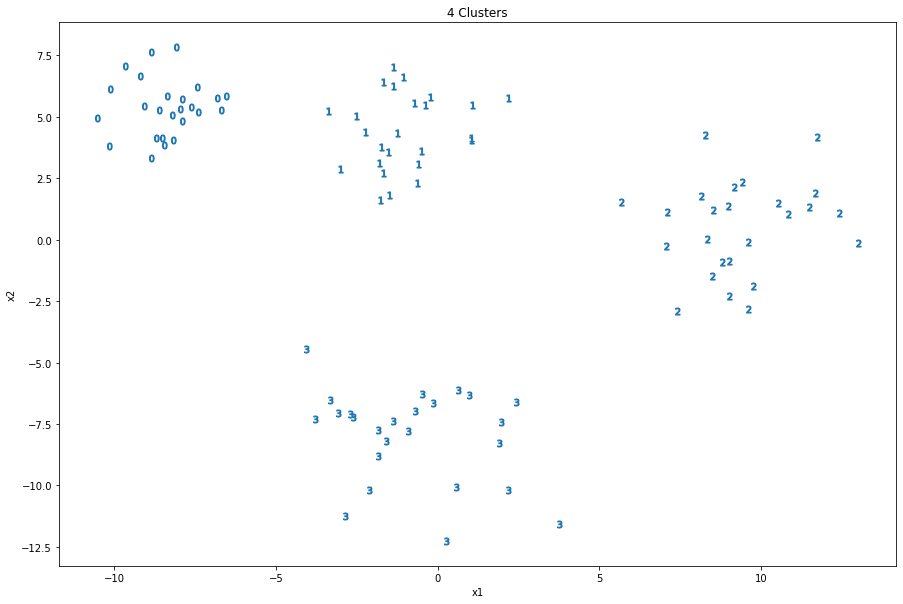

In [7]:
fig,ax = plt.subplots(1,1, figsize=(15,10))

x,y = df_blobs[['x1','x2']], df_blobs['y'] 

plot_2d_cluster(x,y,ax)

Graficamos la dispersión de los datos del conjunto X para visualizar su distribución en el gráfico. El algoritmo no conoce los clústeres todavia, pero esto nos permite identificarlos visualmente de una forma sencilla a simple vista. 

Ahora procederemos a escribir el código para realizar la clusterización.

### Aplicando clustering

La función KMeans de scikit-learn implementa el algoritmo K-Means para realizar la clusterización.

Funciona iterativamente asignando cada muestra al clúster más cercano y ajustando los centroides de los clústeres en función de las muestras asignadas. El objetivo es minimizar la suma de las distancias cuadradas entre las muestras y los centroides de sus clústeres correspondientes.

[documentación KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=4, random_state=7 )

In [10]:
y_pred = kmeans.fit_predict(x)

Text(0.5, 1.0, 'KMeans 4 Clusters')

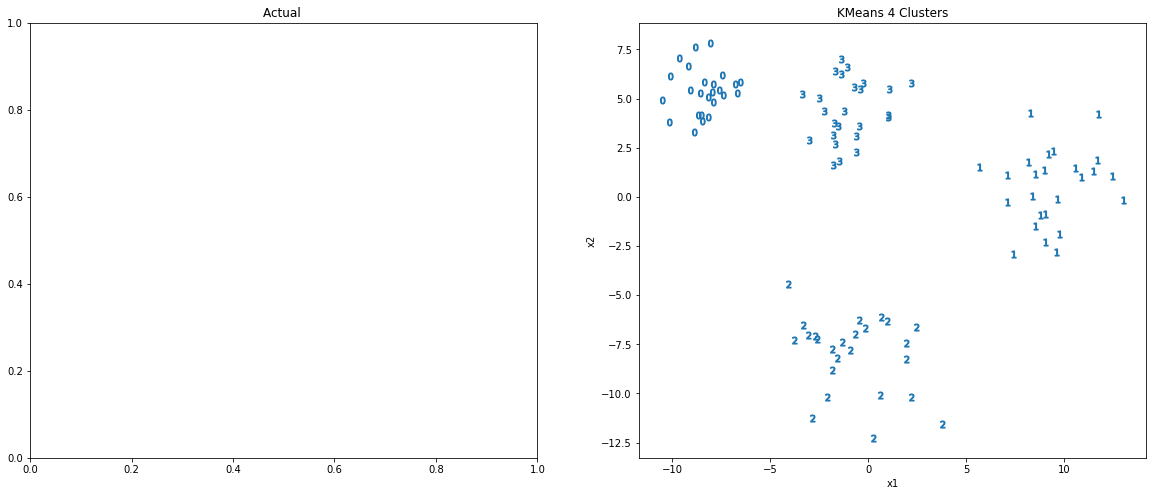

In [11]:
fig,ax = plt.subplots(1,2, figsize=(20,8))

plot_2d_cluster(x,y_pred,ax[1])

# plot_2d_cluster(x,y,ax[0])
ax[0].set_title(f'Actual {ax[0].get_title()}')
ax[1].set_title(f'KMeans {ax[1].get_title()}')

Nuestro modelo de clusterización ha **segmentado correctamente los datos**. No es necesario preocuparse por que las **etiquetas de los clústeres en el gráfico actual no coincidan** con las asignadas por el modelo KMeans. Lo importante es que los **grupos hayan sido separados correctamente**, ya que en el aprendizaje no supervisado no tenemos etiquetas predefinidas. La evaluación del rendimiento se basa en la **coherencia y la calidad de la separación de los grupos**, en lugar de las etiquetas específicas asignadas.

## ¿Cuándo usar clustering?


- **Mayor contexto:** El clustering es útil cuando se busca obtener una visión general y un mayor contexto sobre los datos. Permite identificar patrones, estructuras y relaciones ocultas que podrían no ser evidentes a simple vista. Es útil para explorar y comprender la naturaleza de los datos.

- **Detección de outliers:** El clustering puede ser utilizado para detectar outliers o valores atípicos en un conjunto de datos. Los outliers son muestras que difieren significativamente del resto de los datos y pueden indicar comportamientos anómalos o errores. Al agrupar los datos, los outliers pueden ser identificados como muestras que no se asignan a ningún clúster o como muestras en clústeres pequeños o solitarios.

- **Clasificar/agrupar (sin variable objetivo):** El clustering es útil cuando no se dispone de una variable objetivo o etiquetas predefinidas. Permite agrupar las muestras en función de su similitud y crear grupos coherentes sin necesidad de información externa. Es especialmente útil en casos donde se desea explorar la estructura subyacente de los datos y encontrar agrupaciones naturales sin tener una tarea de clasificación específica.

- **Tareas manuales de crear etiquetas:** El clustering puede ser utilizado en tareas donde se requiere crear etiquetas o categorías manualmente. Por ejemplo, en la organización de documentos o en la segmentación de clientes, se pueden utilizar algoritmos de clustering para agrupar los datos y luego asignar manualmente etiquetas o categorías a cada grupo. Esto facilita la tarea de clasificación y organización de los datos de manera más eficiente.

### Qué puedo lograr?

- **Clasificación de tráfico en una página:** El clustering se puede utilizar para analizar el tráfico de una página web y clasificar a los visitantes en diferentes segmentos según su comportamiento y características. Esto permite comprender mejor el perfil de los usuarios y adaptar estrategias de marketing y personalización.

- **Segmentación de clientes por perfil:** El clustering es útil en el campo del marketing para segmentar clientes en grupos o segmentos homogéneos según sus características demográficas, comportamientos de compra u otras variables relevantes. Esto permite adaptar estrategias de marketing específicas para cada segmento y mejorar la experiencia del cliente.

- **Clasificación de contenido:** El clustering se puede aplicar para organizar grandes volúmenes de contenido, como noticias, documentos o redes sociales, en grupos temáticos. Esto facilita la búsqueda y navegación, así como la recomendación de contenido relevante a los usuarios.

- **Identificar comportamientos fraudulentos:** El clustering puede ser utilizado para detectar comportamientos fraudulentos o anómalos en transacciones financieras, actividades en línea o cualquier otro tipo de datos. Al agrupar los datos, se pueden identificar patrones inusuales que podrían indicar actividades sospechosas o fraudulentas.

- **Ciencia en los deportes:** El clustering se aplica en la ciencia del deporte para analizar datos de rendimiento de los atletas e identificar patrones o perfiles de rendimiento. Esto permite comprender mejor las fortalezas y debilidades de los atletas, así como tomar decisiones basadas en datos para mejorar el rendimiento y prevenir lesiones.

En general, el clustering ofrece muchas posibilidades en diferentes áreas, como marketing, seguridad, recomendación de contenido, deportes y más. Su capacidad para identificar patrones y agrupar datos similares proporciona una herramienta poderosa para obtener información valiosa y tomar decisiones informadas en diversos contextos.

### Clasificacion y clustering

| **Clasificación**                    | **Clustering**                     |
|--------------------------------------|------------------------------------|
| Con variable objetivo.               | Sin variable objetivo.             |
| Más complejo                         | Menos complejo                     |
| Data de entrenamiento / test         | Un solo set de datos.              |
| Asignar datos a determinada clase    | Encontrar similitudes en los datos |
| Se conoce la cantidad de clases      | Se desconoce la cantidad de grupos |
| Dos fases (entrenamiento-predicción) | Una fase                           |

## ¿Cómo evaluar modelos de clustering?

La evaluación de un modelo de clustering se realiza mediante métricas que miden la calidad de la agrupación y la coherencia de los resultados. Algunas de las métricas comunes para evaluar la calidad de un modelo de clustering son las siguientes:


### Coeficiente de silueta (Silhouette coefficient)

**El coeficiente de silueta** es una **métrica popular** para evaluar la calidad de un clustering. Calcula la **distancia media** entre una muestra y los otros puntos dentro de su propio clúster, en comparación con la **distancia media** entre la muestra y los puntos en el clúster más cercano. Un valor de coeficiente de silueta **cercano a 1 indica una buena separación** de los clústeres, mientras que un valor **cercano a -1 indica que las muestras se han asignado incorrectamente**. Un valor **cercano a 0 sugiere superposición de clústeres.**

Formula:

$\displaystyle s(i) =\displaystyle \frac{b-a}{max(a,b)}$

Donde:

- Para cada muestra, se calcula la distancia media $(a)$ entre esa muestra y todas las demás muestras en el mismo clúster.

- Luego, se calcula la distancia media más cercana $(b)$ entre esa muestra y todas las muestras en el clúster más cercano (distinto del clúster al que pertenece la muestra).

- El coeficiente de silueta para cada muestra se calcula utilizando la fórmula: $silueta = (b - a) / max(a, b)$. El coeficiente de silueta varía en el rango de -1 a 1, donde un valor más alto indica una mejor separación entre los clústeres y una asignación más adecuada de las muestras.

- Finalmente, se calcula el coeficiente de silueta promedio para todo el conjunto de datos, tomando el promedio de los coeficientes de silueta individuales.

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_002.png' width=1000>

[Vídeo explicativo](https://www.youtube.com/watch?v=u1EUrxobvk8)

# K-means

## ¿Qué es el algoritmo de K-means y cómo funciona?

### ¿Qué es?

El algoritmo de K-means es un algoritmo de agrupamiento o clustering utilizado para dividir un conjunto de datos en grupos o clústeres basándose en sus similitudes. Es uno de los algoritmos de clustering más comunes y ampliamente utilizados. 

Se basa en la idea de que los puntos de datos en un espacio n-dimensional pueden agruparse en k clústeres, donde k es un número predefinido. El objetivo es minimizar la suma de las distancias cuadradas entre cada punto de datos y el centroide de su clúster asignado.

El algoritmo comienza seleccionando k centroides iniciales de manera aleatoria o utilizando algún método heurístico. Luego, itera en dos pasos hasta converger:

- Asignación de puntos: cada punto de datos se asigna al centroide más cercano en función de la distancia euclidiana u otra medida de similitud.

- Actualización de centroides: los centroides se recalculan como el centroide promedio de todos los puntos asignados a ese clúster.

Estos pasos se repiten hasta que los centroides converjan y no haya cambios en la asignación de puntos a los clústeres. En ese momento, se considera que el algoritmo ha convergido y se obtiene una solución.

<img src='https://miro.medium.com/v2/resize:fit:1400/1*ucaF8Sgo9Bx95Oxxe_Xvig.gif' width=500>

En cuanto a la eficiencia computacional, el algoritmo de K-means puede ser costoso en términos de tiempo de ejecución y uso de recursos computacionales, especialmente cuando se aplica a grandes conjuntos de datos o cuando se requieren muchos clústeres. El costo computacional aumenta linealmente con el número de puntos de datos y el número de iteraciones necesarias para converger.

Sin embargo, existen variantes y optimizaciones del algoritmo de K-means que ayudan a mejorar su eficiencia, como la inicialización inteligente de centroides, la reducción de la dimensionalidad o la paralelización del algoritmo en sistemas distribuidos. Estas técnicas pueden ayudar a mitigar los costos computacionales y hacer que el algoritmo sea más práctico para aplicaciones en tiempo real o con grandes volúmenes de datos.



### ¿Cómo funciona?
- **Indicar cantidad de clusters:** Se especifica el número de clústeres que se desea obtener a partir de los datos. Este valor se establece antes de ejecutar el algoritmo.

- **Ubicar centroides aleatoriamente:** Se seleccionan aleatoriamente K centroides iniciales, donde K es el número de clústeres especificado en el paso anterior. Los centroides son puntos representativos que se utilizan como referencia para la formación de los clústeres.

- **Asignar puntos a los centroides más cercanos:** Cada punto del conjunto de datos se asigna al centroide más cercano en función de su distancia. Se utilizan medidas de distancia, como la distancia euclidiana, para calcular la proximidad entre los puntos y los centroides.

- **Recalcular centroides con el promedio:** Se recalcula la posición de cada centroide tomando el promedio de las posiciones de todos los puntos asignados a ese centroide. Este paso actualiza la ubicación de los centroides en función de los puntos que les han sido asignados.

- **Repetir los pasos 3 y 4 hasta que no se muevan los centroides:** Los pasos 3 y 4 se repiten iterativamente hasta que los centroides ya no se muevan o hasta que se alcance un criterio de convergencia predefinido. En cada iteración, los puntos se reasignan a los centroides más cercanos y los centroides se recalculan. Este proceso continúa hasta que se alcanza la estabilidad, es decir, cuando los centroides no se mueven significativamente o cuando se alcanza un número máximo de iteraciones.

Formula K-Means:


$\displaystyle j=\sum^{k}_{j=1}\sum^{n}_{i=1}||x_i^{j}-c_j||^{2}$

- $j$ es la variable que indica el **índice del clúster**, y se suma desde 1 hasta $k$, donde **$k$ es el número total de clústeres**.

- $n$ es la variable que indica el **índice del punto de datos**, y se suma desde 1 hasta $n$, donde **$n$ es el número total de puntos de datos**.

- $x_i^j$ representa el **punto de datos** $i$ en el clúster $j$. Aquí, $i$ varía de 1 a $n$, y $j$ varía de 1 a $k$.

- $c_j$ es el **centroide del clúster** $j$. Los centroides son puntos que representan el centro o la posición promedio de todos los puntos de datos asignados a ese clúster.

- $||x_i^j - c_j||^2$ representa la **distancia euclidiana al cuadrado entre el punto de datos $x_i^j$ y el centroide $c_j$**. La distancia euclidiana es una medida común utilizada para calcular la similitud o la distancia entre dos puntos en un espacio n-dimensional. Elevar al cuadrado la distancia euclidiana es una elección común en el algoritmo de K-means debido a su simplicidad y propiedades matemáticas.

**Video para ver como calcular K Means**

[K Means Clustering Algorithm | K Means Solved Numerical Example Euclidean Distance by Mahesh Huddar](https://www.youtube.com/watch?v=KzJORp8bgqs)

**Herramienta didactica para la Visualización de la agrupación en clústeres de K-Means**

[Enlace](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

## ¿Cuándo usar K-means?

### Ventajas de K-means

- **Alto rendimiento:** K-means es conocido por su alto rendimiento en grandes conjuntos de datos. Debido a su simplicidad y eficiencia computacional, puede manejar eficientemente grandes volúmenes de datos y escalar a conjuntos de datos masivos.

- **Simplicidad:** K-means es un algoritmo simple de entender e implementar. No requiere conocimientos técnicos avanzados para aplicarlo. Solo implica iteraciones simples de asignación y actualización de centroides, lo que lo hace accesible incluso para principiantes en el campo del análisis de datos.

- **Resultados interpretables:** Los resultados del algoritmo K-means son fáciles de interpretar. Los centroides representan los puntos centrales de cada cluster, y los puntos asignados a un cluster específico son aquellos que están más cerca de su centroide correspondiente. Esto facilita la comprensión y comunicación de los resultados obtenidos.

- **Garantiza convergencia:** El algoritmo K-means garantiza la convergencia, lo que significa que llegará a una solución óptima o cercana a la solución óptima después de un número finito de iteraciones. Esto brinda confianza en los resultados obtenidos y permite una evaluación precisa de los clusters generados.

- **Adaptabilidad a nuevos datos:** Una vez que se ha aplicado el algoritmo K-means y se han obtenido los clusters, el modelo resultante puede adaptarse fácilmente a nuevos datos. Cuando se agregan nuevos puntos de datos, pueden asignarse a los clusters existentes según su proximidad a los centroides. Esto permite utilizar el modelo K-means para clasificar y segmentar nuevos datos sin tener que volver a entrenar todo el modelo desde cero.



### Desventajas de K-means

- **Replicabilidad:** K-means es un algoritmo de agrupamiento basado en la asignación de puntos a centroides, seguido de la actualización de los centroides. Sin embargo, el algoritmo puede tener problemas de replicabilidad, lo que significa que cada ejecución del algoritmo puede producir resultados ligeramente diferentes. Esto se debe a que el algoritmo depende de la inicialización aleatoria de los centroides, lo que puede llevar a diferentes configuraciones iniciales y, por lo tanto, a diferentes resultados finales.

- **Sensibilidad a los outliers:** Los outliers, que son puntos de datos atípicos o extremadamente alejados de los demás, pueden afectar negativamente el rendimiento de K-means. Dado que K-means minimiza la suma de las distancias cuadradas de los puntos al centroide más cercano, los outliers pueden distorsionar el cálculo de los centroides y, por lo tanto, afectar la calidad de los grupos resultantes. Los outliers pueden ser asignados incorrectamente a un grupo o incluso formar su propio grupo separado.

- **Mejor rendimiento en datos esféricos:** K-means asume que los grupos tienen una forma esférica y que la varianza de los grupos es aproximadamente la misma. Sin embargo, cuando los grupos tienen formas irregulares o varianzas diferentes, K-means puede producir resultados subóptimos. Esto se debe a que los centroides pueden no representar correctamente la estructura de los grupos en datos no esféricos. En tales casos, es posible que sea necesario considerar algoritmos de agrupamiento más avanzados, como el algoritmo de agrupamiento espectral.

- **Elección manual de K:** En K-means, el número de grupos K debe especificarse antes de ejecutar el algoritmo. Sin embargo, elegir el valor óptimo de K puede ser un desafío, especialmente cuando no se dispone de información previa sobre la estructura de los datos. Si se selecciona un valor de K inadecuado, es posible que los grupos resultantes no sean significativos o no capturen adecuadamente la estructura subyacente de los datos. En la práctica, se pueden utilizar técnicas como el método del codo o el coeficiente de silueta para ayudar en la elección de K, pero aún así requieren cierto grado de conocimiento y juicio humano.

- **Afectado por alta dimensionalidad:** En dimensiones altas, el espacio se vuelve cada vez más disperso y la noción de distancia euclidiana puede volverse menos significativa. Esto se conoce como la "maldición de la dimensionalidad". K-means puede sufrir de esta limitación, ya que se basa en la distancia euclidiana para calcular las asignaciones y actualizar los centroides. En dimensiones altas, los datos pueden estar casi equidistantes entre sí o pueden haber regiones muy dispersas sin puntos de datos, lo que dificulta la formación de grupos significativos. En tales casos, es posible que se requieran técnicas de reducción de dimensionalidad o algoritmos de agrupamiento más avanzados que sean menos sensibles a la alta dimensionalidad.



### ¿Cuándo usar K-means?

- **Conocimiento previo del número de clusters:** K-means es adecuado cuando se tiene una idea clara del número de grupos esperados en los datos. El algoritmo requiere especificar el valor de K de antemano, lo que significa que debes saber cuántos grupos quieres obtener.

- **Necesidad de resultados rápidos:** K-means es computacionalmente eficiente y puede manejar grandes conjuntos de datos de manera relativamente rápida. Si tienes limitaciones de tiempo y necesitas resultados rápidos, K-means puede ser una buena opción.

- **Resultados interpretables:** K-means proporciona resultados que son fácilmente interpretables. Los centroides representan los centros de los grupos y las asignaciones de puntos a los grupos son claras. Esto facilita la interpretación y comprensión de los resultados obtenidos.

- **Forma de datos esférica:** K-means funciona mejor cuando los grupos tienen una forma esférica y una varianza similar. Si tus datos tienen grupos con estas características, K-means puede ser una opción adecuada.

- **Escalabilidad:** K-means se puede escalar para manejar grandes conjuntos de datos y puede ser utilizado en problemas de minería de datos a gran escala. Puedes obtener resultados satisfactorios incluso con conjuntos de datos extensos y dimensionalidad moderada.



## Implementando K-means

### Clustering con K-means

#### Importar librerias

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import kmeans_plusplus
from sklearn.metrics import silhouette_score
from yellowbrick.cluster.silhouette import silhouette_visualizer

sns.set_style(style='whitegrid')

#### Preparando datos de prueba

In [13]:
# Genera un conjunto de datos sintéticos con la función make_blobs

# n_samples: el número total de puntos de datos que se generarán
# cluster_std: la desviación estándar de los clústeres generados
# centers: el número de clústeres o grupos a generar
# n_features: el número de características o dimensiones de los puntos de datos
# return_centers: si se devuelven los centros de los clústeres generados

x,y,c = make_blobs(n_samples=500, cluster_std=0.8, centers=4, n_features=2, return_centers=True, random_state=42)

Visualizamos **X**,**Y** e **C**

In [14]:
x

array([[ -7.9189091 ,   6.76098178],
       [ -9.03713651,  -6.92354549],
       [  6.39172118,   1.32653106],
       [ -2.82288415,   7.84347417],
       [ -5.91865605,  -7.20656989],
       [ -6.21535854,  -7.56497665],
       [ -6.79026013,   7.246675  ],
       [ -6.66326173,  -6.92030008],
       [  3.78578249,   1.8592661 ],
       [ -7.37948205,  -6.85923675],
       [  4.12262053,   1.10793128],
       [ -1.58232116,   8.35774027],
       [  6.34630554,   0.41149944],
       [ -2.05248521,   9.92273864],
       [ -6.64780731,  -5.21978895],
       [  5.48661843,   0.56617809],
       [ -2.56680572,   9.81711245],
       [ -9.73650537,   7.62945071],
       [ -8.77250057,   8.17590722],
       [ -3.3942656 ,   8.05732083],
       [  3.52102478,   2.42354507],
       [ -2.34210675,   7.44655003],
       [  5.10112441,   2.22216981],
       [ -7.58590853,   7.27092271],
       [ -9.19547465,   7.47879491],
       [ -6.56406548,  -7.21689718],
       [ -7.08360897,  -5.6769152 ],
 

In [15]:
y

array([3, 2, 1, 0, 2, 2, 3, 2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 3, 3, 0, 1, 0,
       1, 3, 3, 2, 2, 3, 3, 0, 2, 0, 0, 0, 2, 2, 1, 1, 3, 3, 2, 1, 0, 0,
       0, 1, 1, 1, 2, 3, 2, 0, 3, 2, 1, 0, 0, 3, 2, 3, 3, 0, 2, 3, 1, 2,
       2, 3, 1, 2, 1, 2, 2, 3, 0, 3, 0, 2, 1, 0, 2, 1, 2, 0, 3, 3, 3, 3,
       1, 0, 3, 2, 1, 2, 1, 3, 0, 1, 0, 3, 1, 1, 1, 3, 3, 0, 0, 3, 0, 3,
       2, 3, 3, 3, 3, 2, 1, 3, 2, 2, 0, 1, 2, 1, 3, 1, 1, 2, 2, 3, 3, 1,
       1, 2, 1, 3, 3, 3, 1, 1, 2, 3, 1, 1, 2, 3, 3, 0, 0, 0, 2, 2, 1, 1,
       0, 3, 0, 3, 2, 2, 3, 3, 1, 1, 2, 0, 1, 2, 3, 3, 2, 0, 0, 3, 3, 0,
       0, 2, 2, 2, 0, 3, 0, 0, 3, 3, 0, 1, 0, 2, 2, 3, 3, 2, 0, 2, 0, 0,
       3, 2, 0, 0, 2, 3, 1, 3, 2, 1, 1, 3, 3, 2, 3, 0, 0, 2, 0, 3, 0, 1,
       1, 0, 3, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 3, 2, 0, 2, 1, 1, 1, 2,
       0, 1, 3, 3, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 3, 0, 2, 1, 0, 0, 3, 0,
       2, 2, 1, 0, 1, 2, 0, 0, 1, 3, 0, 0, 0, 1, 3, 2, 0, 1, 1, 0, 2, 0,
       1, 3, 1, 2, 2, 0, 0, 1, 3, 1, 3, 1, 2, 1, 2,

In [16]:
c

array([[-2.50919762,  9.01428613],
       [ 4.63987884,  1.97316968],
       [-6.87962719, -6.88010959],
       [-8.83832776,  7.32352292]])

In [17]:
# Crea un DataFrame utilizando pandas


df_blobs = pd.DataFrame(
    {
        'x1': x[:,0], # Los valores de 'x1' se toman de la primera columna del arreglo x
        'x2': x[:,1], # Los valores de 'x2' se toman de la segunda columna del arreglo x
        'y': y        # Los valores de 'y' se toman del arreglo y
    }
)

In [18]:
df_blobs

,x1,x2,y
0,-7.918909,6.760982,3
1,-9.037137,-6.923545,2
2,6.391721,1.326531,1
3,-2.822884,7.843474,0
4,-5.918656,-7.206570,2
...,...,...,...
495,-7.718843,8.063230,3
496,-2.570879,9.287208,0
497,-7.148255,-5.544892,2
498,-7.297806,-6.040902,2


In [19]:
# Crea un DataFrame utilizando pandas
df_centers = pd.DataFrame(
    {
        'x1': c[:,0], # Los valores de 'x1' se toman de la primera columna del arreglo c
        'x2': c[:,1]  # Los valores de 'x2' se toman de la segunda columna del arreglo 
    }
)

In [20]:
df_centers

,x1,x2
0,-2.509198,9.014286
1,4.639879,1.973170
2,-6.879627,-6.880110
3,-8.838328,7.323523


#### Visualizacion de datos

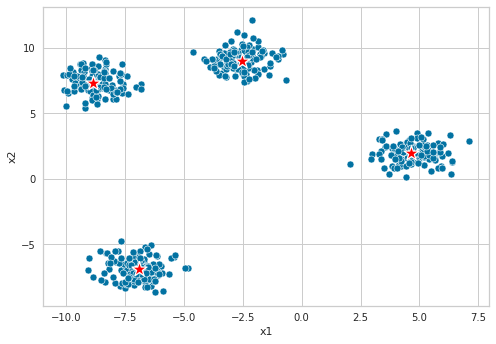

In [21]:
# Visualización del scatter plot de los datos en df_blobs
sns.scatterplot(data=df_blobs, x='x1', y='x2')

# Visualización del scatter plot de los centros en df_centers
sns.scatterplot(data=df_centers, x='x1',y='x2', marker='*',s=250,color='red')
plt.show()

#### Aplicando K-means

In [22]:
# Crear una instancia del algoritmo K-means con 4 clusters
kmeans = KMeans(n_clusters=4)

# Realizar el agrupamiento y obtener las etiquetas de los clusters para cada punto de datos en x
df_cluster = kmeans.fit_predict(x)

# Agregar la columna 'cluster' al DataFrame df_blobs con las etiquetas de los clusters
df_blobs['cluster'] = df_cluster

# Obtener los centros de los clusters generados por K-means
k_means_centers = kmeans.cluster_centers_

# Crear un DataFrame df_kmeans_center con los centros de los clusters
df_kmeans_center = pd.DataFrame(
    {
        'x1': k_means_centers[:,0],  # Primera columna de k_means_centers
        'x2': k_means_centers[:,1]   # Segunda columna de k_means_centers
    }
)

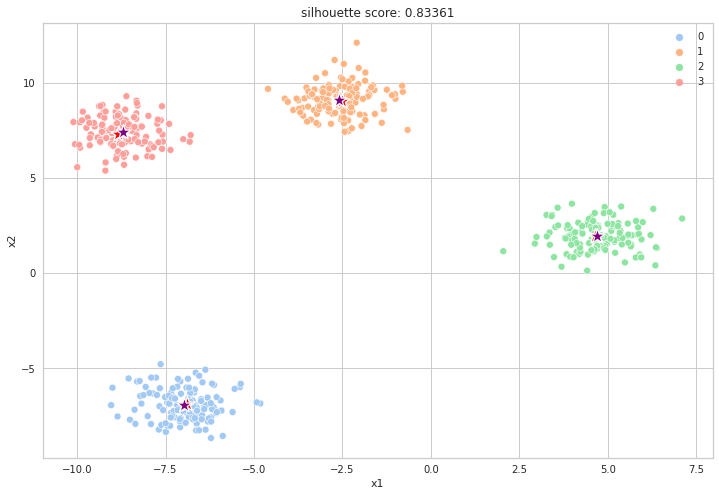

In [23]:
plt.figure(figsize=(12,8))

# Visualización del scatter plot de los datos en df_blobs
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='pastel')

# Visualización del scatter plot de los centros en df_centers
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='*', s=250, color='red')

# Visualización del scatter plot de los centros de K-means en df_kmeans_center
sns.scatterplot(data=df_kmeans_center, x='x1', y='x2', marker='*', s=250, color='purple')

plt.title(f'silhouette score: {silhouette_score(x,df_blobs["cluster"]).round(5)}')
plt.show()

En nuestro ejemplo, el **silhouette score obtenido fue del 0.83%**. Ahora es el momento de que **experimentes y pruebes con distintos números de clusters (k) y desviación estándar** para observar cómo cambia el gráfico en función de la cantidad de grupos que creemos que existen en los datos.

## Encontrando el valor de K

En el algoritmo de K-means tendemos a desconocer el valor óptimo de K.

El valor de K determina el número de clústeres en los que se agruparán los datos y afecta directamente la calidad de los resultados obtenidos. 

Para encontrar el valor adecuado, se pueden utilizar diversos enfoques. Algunos métodos comunes incluyen la inspección visual de los resultados, el uso de criterios de evaluación internos y externos, y la técnica de "elbow" o codo.

### Método del codo (Elbow method)

El método del codo, también conocido como "elbow method" en inglés, es una técnica común utilizada para determinar el valor adecuado de K en el algoritmo de K-means. Este método se basa en la evaluación de la **suma de los cuadrados dentro de los clústeres, conocida como WCSS (Within-Cluster Sum of Squares)**.

La fórmula para calcular el WCSS es la siguiente:

$WCSS = \sum d(i, centroid)^2$

Donde:

- $\sum$ representa la sumatoria de los valores para todos los puntos dentro de los clústeres.
- $d(i, centroid)$ es la distancia entre un punto de datos i y el centroide del clúster al que pertenece. Esta distancia puede ser calculada utilizando diversas métricas, como la distancia euclidiana.

La idea principal detrás del método del codo es evaluar cómo varía el WCSS a medida que aumentamos el valor de K. Comenzamos con un valor bajo de K y vamos incrementándolo gradualmente. Para cada valor de K, ejecutamos el algoritmo de K-means y calculamos el WCSS correspondiente.

Luego, trazamos un gráfico de los valores de K en el eje horizontal y los valores de WCSS en el eje vertical. Buscamos el punto en el gráfico donde la **disminución en el valor de WCSS se estabiliza significativamente, formando una especie de "codo"**. Este punto indica que agregar más clústeres no proporciona una mejora significativa en la agrupación.

Por lo tanto, el valor de K correspondiente a este "codo" es considerado como el valor adecuado, ya que representa un equilibrio entre una buena agrupación y evitar la sobredivisión de los datos. Es importante tener en cuenta que el método del codo es una técnica heurística y subjetiva, por lo que se requiere un análisis cuidadoso y la consideración de otros factores antes de tomar una decisión final sobre el valor de K.

<img src='https://miro.medium.com/v2/resize:fit:1400/0*M_14K8uPMOXxC74E' width=600>

In [24]:
def viz_cluster(k,ax=None):
    # Crear una instancia del algoritmo K-means con 4 clusters
    kmeans = KMeans(n_clusters=k)
    # Realizar el agrupamiento y obtener las etiquetas de los clusters para cada punto de datos en x
    df_cluster = kmeans.fit_predict(x)
    # Agregar la columna 'cluster' al DataFrame df_blobs con las etiquetas de los clusters
    df_blobs['cluster'] = df_cluster
    # Obtener los centros de los clusters generados por K-means
    k_means_centers = kmeans.cluster_centers_
    # Crear un DataFrame df_kmeans_center con los centros de los clusters
    df_kmeans_center = pd.DataFrame(
        {
            'x1': k_means_centers[:,0],  # Primera columna de k_means_centers
            'x2': k_means_centers[:,1]   # Segunda columna de k_means_centers
        }
    )

    plt.figure(figsize=(12,8))
    # Visualización del scatter plot de los datos en df_blobs
    sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='pastel',ax=ax);
    # Visualización del scatter plot de los centros en df_centers
    sns.scatterplot(data=df_centers, x='x1', y='x2', marker='*', s=250, color='red',ax=ax);
    # Visualización del scatter plot de los centros de K-means en df_kmeans_center
    sns.scatterplot(data=df_kmeans_center, x='x1', y='x2', marker='*', s=250, color='purple',ax=ax);
    if ax != None:
        ax.set_title(f'silhouette score: {silhouette_score(x,df_blobs["cluster"]).round(5)}');
    else:
        plt.title(f'silhouette score: {silhouette_score(x,df_blobs["cluster"]).round(5)}');


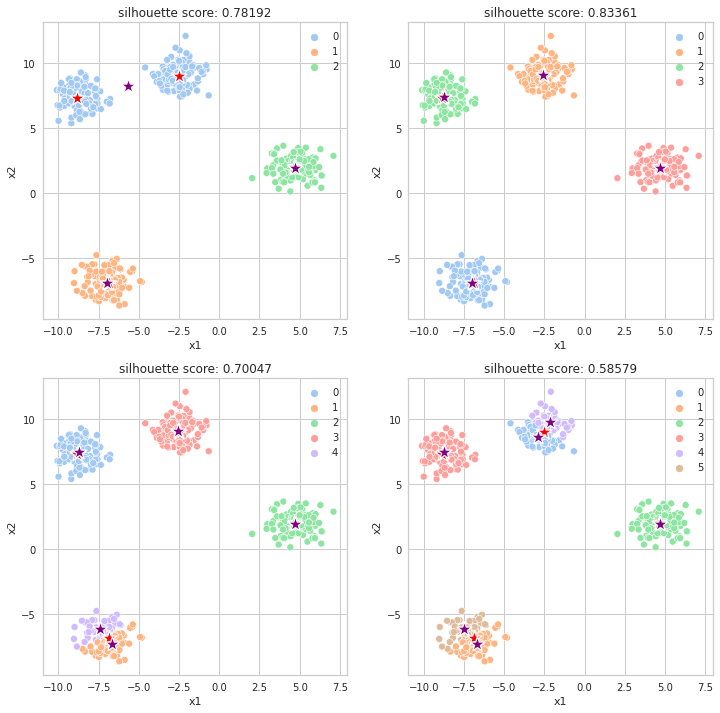

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12));
for i in range(2):
    for j in range(2):
        ax = axs[i, j]
        viz_cluster(i*2 + j + 3,ax);

Con esta simple iteración, pudimos comparar diferentes segmentaciones de K-means y evaluar su coeficiente de silueta. Descubrimos que la mejor segmentación, en este ejemplo práctico, fue con 4 clusters. Sin embargo, en casos con múltiples dimensiones y limitaciones de recursos, el método del codo puede ser útil para determinar el valor óptimo de K.

#### Encontrando el valor de K

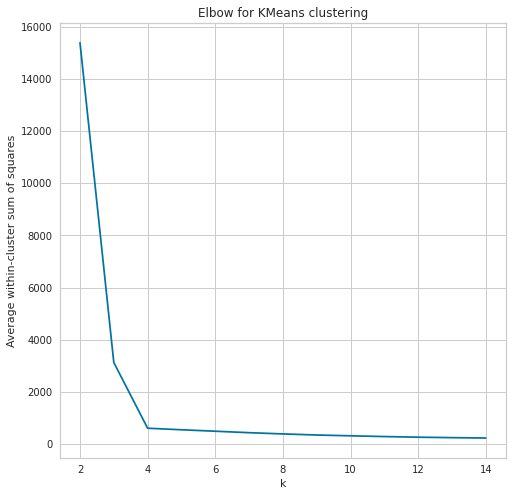

In [26]:
sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.show()

Al observar el gráfico del método del codo, podemos identificar que la línea muestra un quiebre en el valor 4, lo cual indica que ese es el valor óptimo de $K$ para la segmentación mediante K-means. Este quiebre es un indicador de la elección adecuada del número de clusters.

Ahora utilizaremos el coeficiente de silueta para determinar el número óptimo de clusters ($K$). Calcularemos el índice de silueta para diferentes valores de $K$ y seleccionaremos aquel que obtenga el valor más alto, lo cual nos indicará la mejor segmentación en términos de la calidad de los clusters.

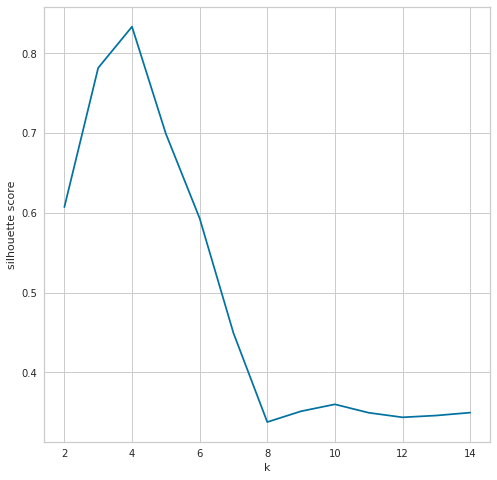

In [27]:
silhouetteScore = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(x)
    y = km.predict(x)
    silhouetteScore.append(silhouette_score(x,y))

plt.figure(figsize=(8,8))
plt.plot(K, silhouetteScore, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show()

Un $K$ igual a 4 obtiene el coeficiente de silueta más alto, reafirmando que esa es la mejor opción para la segmentación de clusters.


Ahora exploraremos la gráfica de silueta utilizando el valor óptimo de K que determinamos previamente con las técnicas mencionadas. Esta gráfica nos brindará una visualización más detallada de la calidad de la segmentación y la separación de los clusters.

## Evaluando resultados de K-means

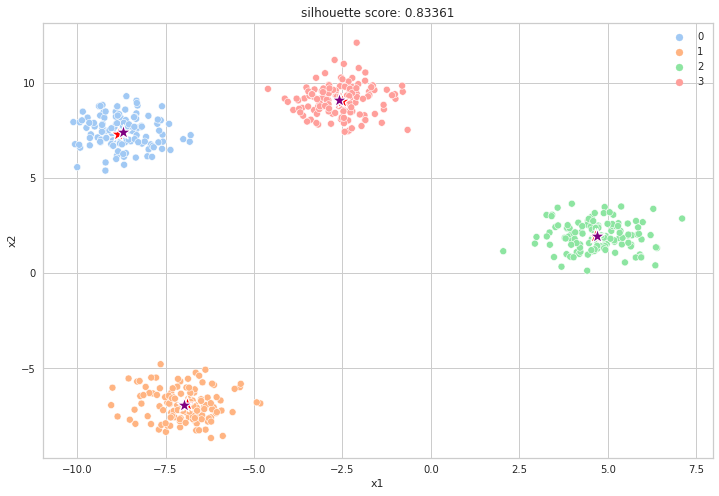

In [28]:
# Visualizamos los clusters con el valor optimo de K
viz_cluster(4)

https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html#quick-method

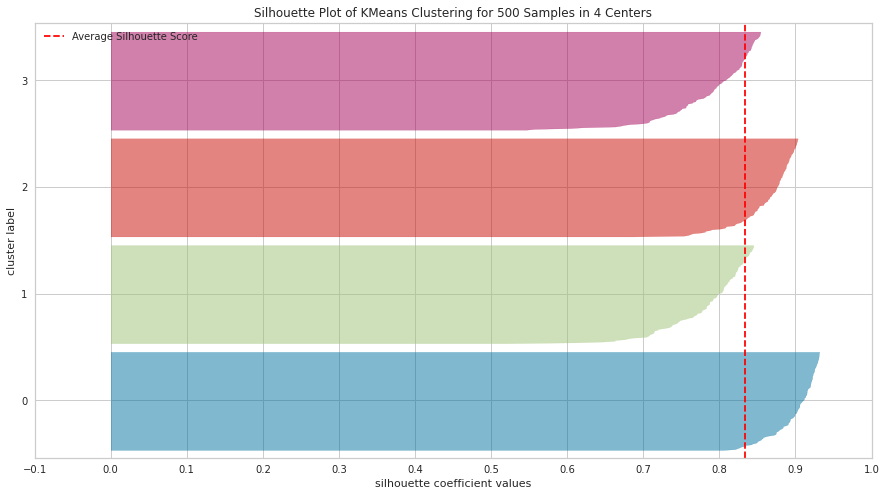

In [29]:
km = KMeans(n_clusters=4)
km.fit(x)

plt.figure(figsize=(15,8))

silhouette_visualizer(km,x,colors='yellowbrick');

# Hierarchical clustering

## ¿Qué es hierarchical clustering y cómo funciona?

### ¿Qué es hierarchical clustering?

El hierarchical clustering, o clustering jerárquico, es un método de agrupamiento que busca construir una jerarquía de clusters. 

Inicialmente, cada dato se considera un cluster individual y luego se van fusionando gradualmente en clusters más grandes basándose en la similitud entre ellos. El resultado es un árbol jerárquico llamado dendrograma, que muestra las relaciones de agrupamiento entre los datos. El hierarchical clustering no requiere especificar el número de clusters de antemano y puede ser utilizado para descubrir estructuras de agrupamiento en los datos.

<img src='https://dashee87.github.io/images/hierarch.gif' width=600>

[Como funciona Hierarchical Clustering](https://www.youtube.com/watch?v=0jPGHniVVNc)

### ¿Qué son los métodos de linkage ?

Los **métodos de linkage** son enfoques utilizados en el clustering jerárquico para calcular la **distancia o similitud entre clusters**. Estos métodos determinan cómo se deben fusionar los clusters en cada etapa del proceso de agrupamiento.

Existen diferentes métodos de linkage, como el **enlace completo** (complete linkage), el **enlace único** (single linkage) y el **enlace promedio** (average linkage), entre otros. Cada método utiliza una fórmula específica para calcular la distancia o similitud entre los puntos de los clusters.

El enlace completo considera la **distancia máxima** entre los puntos de dos clusters, el enlace único toma en cuenta la **distancia mínima**, y el enlace promedio calcula el **promedio de las distancias**. La elección del método de linkage es importante, ya que puede afectar los resultados del clustering y la interpretación de los resultados.

<img src='https://i2.wp.com/dataaspirant.com/wp-content/uploads/2020/12/15-Hierarchical-Clustering-Linkages.png?resize=609%2C659&ssl=1'>

[Como funcionan los Linkage Methods](https://www.youtube.com/watch?v=vg1w5ZUF5lA)


Existen dos enfoques principales en el hierarchical clustering:

- **Clustering aglomerativo** comienza con **cada dato como un cluster individual y fusiona los clusters más cercanos hasta formar un único cluster**. Se utiliza una medida de similitud, como la distancia euclidiana o la correlación, para determinar la cercanía entre clusters.

- **Clustering divisivo** inicia con un **único cluster** que contiene todos los datos y **se divide en clusters más pequeños en cada paso**. Se elige un criterio para dividir el cluster existente en dos subclusters hasta que cada dato forme su propio cluster.

<img src='https://quantdare.com/wp-content/uploads/2016/06/AggloDivHierarClustering-800x389.png' width=500>

## ¿Cuándo usar hierarchical clustering?

### Ventajas

- **No necesitas conocer K:** A diferencia de otros algoritmos de clustering, como K-means, el agglomerative clustering no requiere que especifiques previamente el número de clusters (K). El algoritmo automáticamente determina la estructura jerárquica de los clusters a medida que fusiona grupos en función de la similitud de los datos.

- **Simple:** El algoritmo de clustering aglomerativo es relativamente simple de implementar y entender. Se basa en el principio de fusionar gradualmente los clusters más cercanos para formar grupos más grandes.

- **Resultado interpretable:** El clustering aglomerativo produce una estructura jerárquica de clusters que se puede representar mediante un dendograma. Esto permite una interpretación visual clara de cómo se agrupan los datos a diferentes niveles de similitud. Además, puedes elegir el nivel de corte en el dendograma para obtener el número deseado de clusters.

- **Única ejecución:** El agglomerative clustering se realiza en una sola ejecución, lo que significa que no necesita inicializaciones aleatorias ni iteraciones como en otros algoritmos. Esto lo hace más rápido y eficiente en términos de tiempo de ejecución.

- **Ayuda visual con dendograma:** El dendograma generado en el clustering aglomerativo proporciona una ayuda visual valiosa para comprender la estructura de los clusters y las relaciones entre ellos. Puedes identificar claramente las ramas del dendograma que corresponden a los diferentes clusters y determinar cómo se agrupan los datos en función de la similitud.

### Desventajas

- **Mal performance en datasets largos:** El agglomerative clustering puede volverse computacionalmente costoso y tener un mal rendimiento en conjuntos de datos grandes. A medida que aumenta el tamaño del conjunto de datos, el tiempo de ejecución y los requisitos de memoria también pueden aumentar considerablemente.

- **Sin objetivo matemático:** A diferencia de otros algoritmos de clustering, como K-means, el agglomerative clustering no optimiza una función objetivo matemática. Esto significa que no hay una medida clara y objetiva para evaluar la calidad del clustering resultante. La interpretación de los resultados puede ser más subjetiva y depende del análisis visual y la elección del nivel de corte en el dendograma.

- **Los outliers le afectan:** El agglomerative clustering es sensible a los outliers, que son puntos de datos atípicos o que se alejan significativamente del resto de los datos. La presencia de outliers puede afectar la formación de los clusters y alterar la estructura jerárquica.

- **Mayor necesidad de cómputo:** El agglomerative clustering requiere más recursos computacionales en comparación con algunos otros algoritmos de clustering. Esto se debe a la necesidad de calcular y actualizar las distancias o similitudes entre clusters en cada iteración del proceso de agrupamiento.

### ¿Cuándo usarlo?

- **Comprender resultados visualmente:** Si deseas tener una representación visual clara de la estructura de los clusters y las relaciones entre ellos, el agglomerative clustering es una opción adecuada. El dendograma generado por este método permite una interpretación visual intuitiva de cómo se agrupan los datos.

- **Dataset es pequeño:** El agglomerative clustering puede ser más eficiente en términos de tiempo de ejecución y recursos computacionales en conjuntos de datos pequeños. Si tu conjunto de datos no es demasiado grande, puedes considerar este método de clustering.

- **Desconozco el número de clusters:** Si no tienes información previa sobre el número de clusters óptimo en tus datos, el agglomerative clustering puede ser útil. No es necesario especificar el número de clusters de antemano, ya que el algoritmo fusiona gradualmente los grupos más cercanos y genera una estructura jerárquica que se puede interpretar visualmente.

- **Resultado rápido:** Si necesitas obtener rápidamente un resultado de clustering sin tener que realizar múltiples iteraciones o ajustes de parámetros, el agglomerative clustering puede ser una opción conveniente. Se ejecuta en una sola pasada, lo que lo hace más rápido en comparación con algunos otros algoritmos de clustering.

## Implementando hierarchical clustering


#### Importar librerias

In [30]:
import numpy as np
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

#### Preparando los datos de prueba

In [31]:
# Genera un conjunto de datos sintéticos con la función make_blobs
x,y,c = make_blobs(n_samples=500, cluster_std=0.8, centers=4, n_features=2, return_centers=True, random_state=40)

df_blobs = pd.DataFrame({
    "x1": x[:,0],
    "x2": x[:,1],
    'y': y
})

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1]  
    }
)

#### Visualización de datos

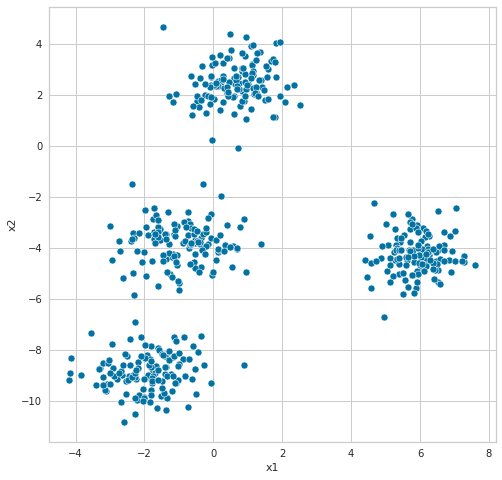

In [32]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2')
plt.show()

#### Dendograma y Hierarchical Cluster

Un [dendograma](https://es.wikipedia.org/wiki/Dendrograma) es una representación gráfica de la **jerarquía de los clusters** en un análisis de clustering. En un dendograma, los puntos de datos se muestran como hojas y los clusters se fusionan a medida que se asciende en el gráfico. La **altura de las fusiones en el dendograma representa la distancia o la disimilitud entre los clusters**.

Para determinar el **número óptimo de clusters (K)** a partir de un dendograma, se busca un punto en el gráfico donde haya una **mayor distancia vertical entre las fusiones sucesivas**. Este punto se puede interpretar como un "corte" en el dendograma, indicando el número de clusters óptimo.

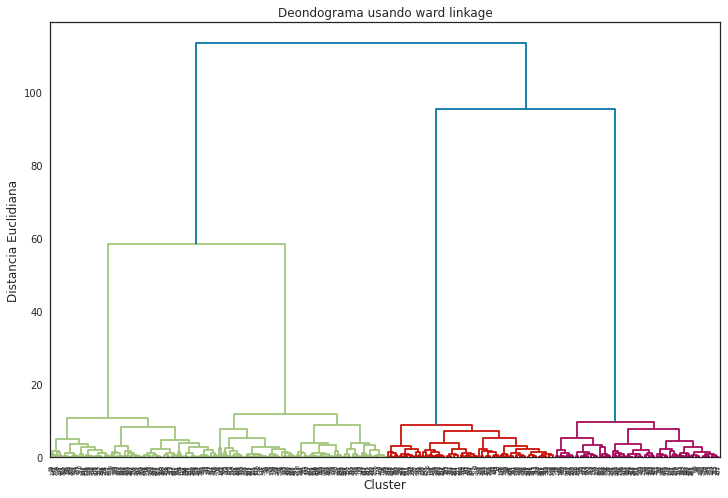

In [33]:
sns.set_style(style='white')
fig = plt.figure(figsize=(12,8))

dendrogram_plot = dendrogram(linkage(x, method='ward'))

plt.title('Deondograma usando ward linkage')
plt.xlabel('Cluster',fontsize=12)
plt.ylabel('Distancia Euclidiana',fontsize=12)
plt.show();

En el caso de separar en **4 clusters**, se buscará en el dendograma un punto donde haya una distancia vertical **significativa entre la fusión de 3 clusters y la siguiente fusión**. Este punto se identificará como el número óptimo de clusters, en este caso, 4.

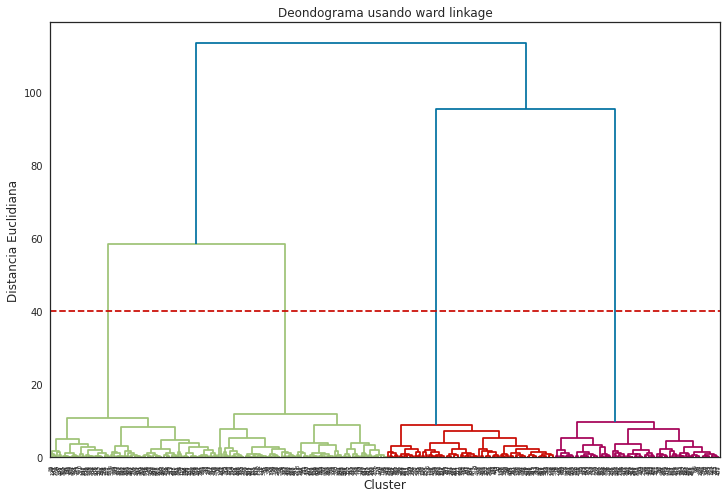

In [34]:
sns.set_style(style='white')
fig = plt.figure(figsize=(12,8))

dendrogram_plot = dendrogram(linkage(x, method='ward'))

plt.title('Deondograma usando ward linkage')
plt.hlines(y=40, xmin=0, xmax=5000, linestyles='dashed', colors='r')
plt.xlabel('Cluster',fontsize=12)
plt.ylabel('Distancia Euclidiana',fontsize=12)
plt.show();

In [35]:
#hc = Herarchical Clustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)
estimator_hc = hc.fit(x)

In [36]:
df_blobs['cluster'] = y_hc

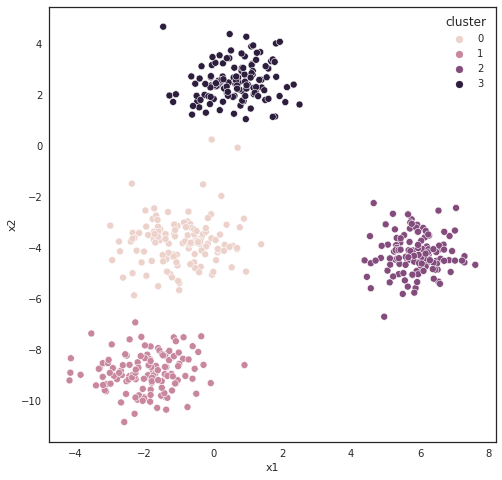

In [37]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.show();

#### Evaluación de hierarchical clustering

In [38]:
silhouette_score(x,y_hc)

0.7512336349628577

El **coeficiente de silueta** del clustering jerárquico fue de **0.75**, indicando una estructura de clusters adecuada y puntos bien asignados a sus respectivos grupos.

Ahora nos enfrentamos a un desafío al intentar generar la gráfica de silueta para el clustering jerárquico aglomerativo. A diferencia del algoritmo KMeans, el clustering jerárquico no proporciona centroides. Sin embargo, encontramos un artículo en la documentación de Scikit-learn que nos brinda un código modificado para adaptarlo al clustering jerárquico y así poder generar la gráfica de silueta.

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [3,4,5,6]

def plot_herarchical_cluster(x,range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.

        clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
        cluster_labels = clusterer.fit_predict(x)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(x, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(x, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            x[:, 0], x[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        
    plt.show()


For n_clusters = 4 The average silhouette_score is : 0.7512336349628577


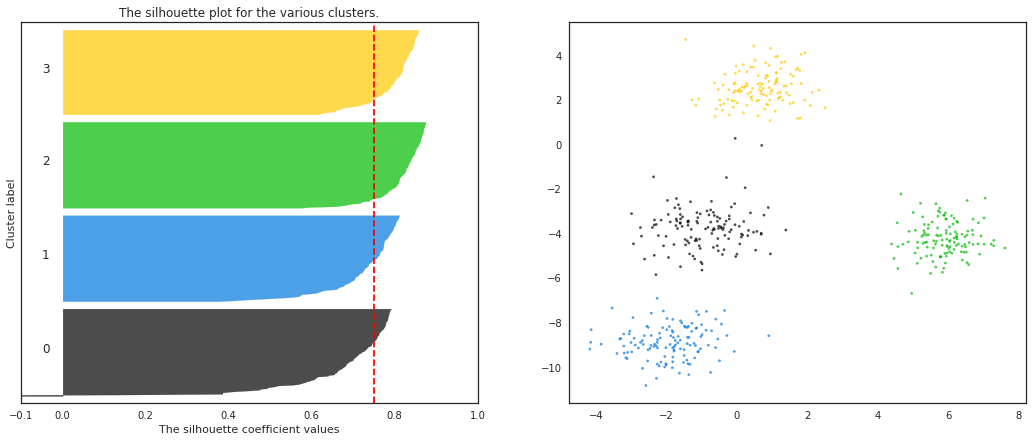

In [40]:
range_n_clusters = [4]
plot_herarchical_cluster(x, range_n_clusters)

For n_clusters = 3 The average silhouette_score is : 0.6824972906393126
For n_clusters = 5 The average silhouette_score is : 0.6470971018455739
For n_clusters = 6 The average silhouette_score is : 0.5532724580573445


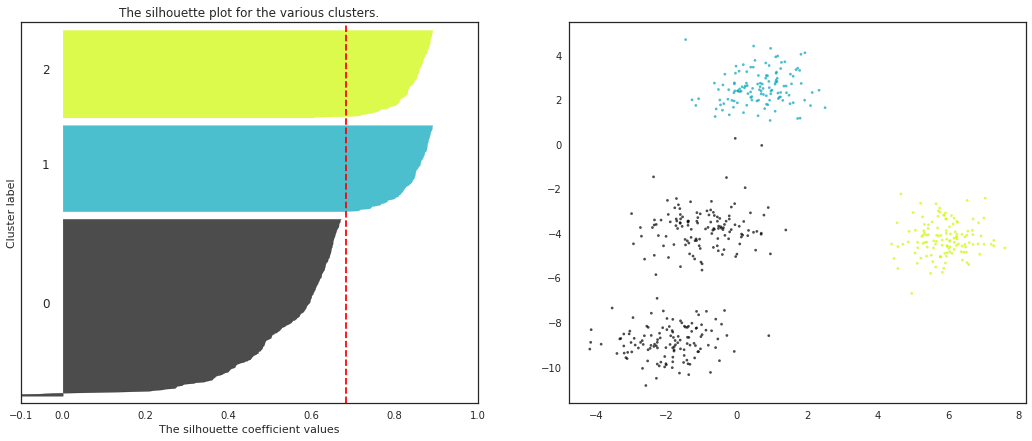

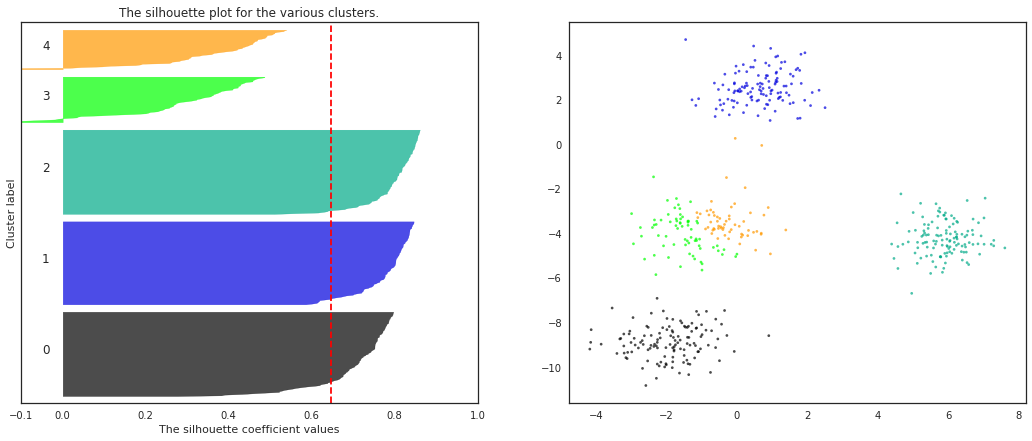

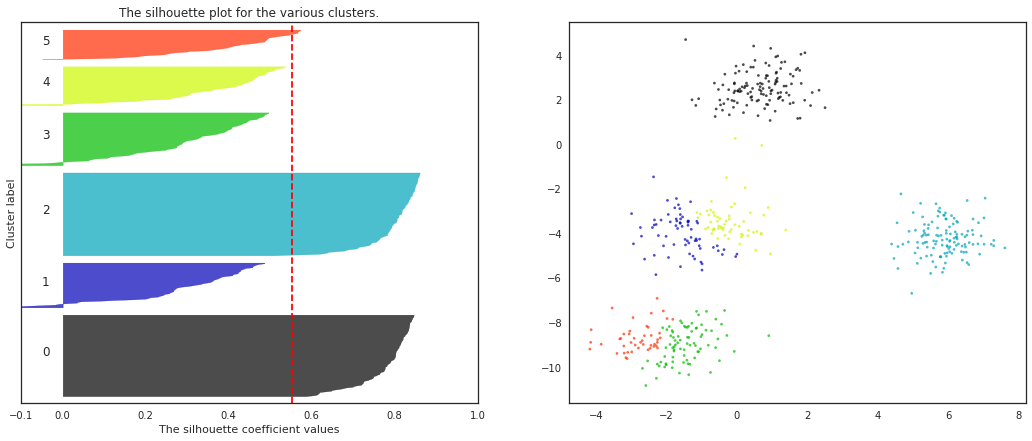

In [41]:
range_n_clusters = [3,5,6]
plot_herarchical_cluster(x, range_n_clusters)

Ahora que hemos adaptado el código, podemos observar que con 5 y 6 clusters se producen superposiciones en los datos, lo que resulta en valores negativos en la gráfica de silueta. Esto indica que la asignación de puntos a los clusters en esos casos no es óptima y existen ciertos solapamientos.

# DBSCAN

## ¿Qué es DBSCAN y cómo funciona?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering que se basa en la densidad de los puntos en el espacio para agruparlos. A diferencia de otros algoritmos de clustering, como K-means o el clustering jerárquico, DBSCAN no requiere que se especifique el número de clusters de antemano.

El algoritmo DBSCAN define los siguientes conceptos clave:

- **Puntos núcleo (core points):** Son aquellos puntos que tienen al menos un número mínimo de puntos dentro de una distancia específica (llamada epsilon).
- **Vecinos directos (direct neighbors):** Son aquellos puntos que se encuentran dentro de la distancia epsilon de un punto dado.
- **Puntos de borde (border points):** Son aquellos puntos que tienen menos vecinos que el número mínimo requerido, pero están dentro de la distancia epsilon de un punto núcleo.
- **Puntos de ruido (noise points):** Son aquellos puntos que no son núcleo ni borde.

### ¿Cómo funciona?

El algoritmo DBSCAN funciona de la siguiente manera:

- Se selecciona un punto aleatorio no visitado.
- Se determina si el punto es un punto núcleo, un punto de borde o un punto de ruido.
- Si el punto es un punto núcleo, se expande el cluster a través de sus vecinos directos, añadiendo los puntos vecinos al cluster.
- Se repite el proceso para los nuevos puntos añadidos al cluster hasta que no se encuentren más puntos núcleo ni borde.
- Se selecciona un nuevo punto no visitado y se repite el proceso hasta que todos los puntos hayan sido visitados.
- El resultado de DBSCAN es un conjunto de clusters que se forman en función de la densidad de los puntos en el espacio. Los puntos de ruido quedan clasificados como puntos individuales fuera de los clusters.


DBSCAN utiliza conceptos y métricas como la distancia euclidiana, el radio epsilon y la densidad de puntos para determinar los clusters. Sin embargo, se pueden describir las etapas y los conceptos clave del algoritmo:

Definir los parámetros:

- **Epsilon (ε):** un valor que representa la distancia máxima entre dos puntos para que se consideren vecinos.
- **MinPts:** el número mínimo de puntos requeridos para formar un cluster.

Identificar los puntos centrales:

- Un punto se considera central si tiene al menos MinPts puntos dentro de su radio ε.

Expandir los clusters:

- Para cada punto central, se formará un cluster y se expandirá incluyendo todos sus vecinos alcanzables dentro del radio ε.
- Se repite este proceso hasta que no se puedan expandir más clusters.

Etiquetar puntos:
- Los puntos que no pertenecen a ningún cluster se consideran ruido o puntos anómalos.

Aunque DBSCAN no tiene una fórmula matemática única, se basa en la idea de densidad y conectividad espacial para formar clusters.

[Cómo funciona el algoritmo de DBSCAN](https://www.youtube.com/watch?v=RDZUdRSDOok)

[Visualizing DBSCAN Clustering](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

## ¿Cuándo usar DBSCAN?


### Ventajas de DBSCAN

- **No necesitas especificar el número de clusters:** A diferencia de otros algoritmos de clustering, en DBSCAN no es necesario especificar previamente el número de clusters que se esperan en los datos. El algoritmo determina automáticamente el número de clusters basándose en la densidad de los puntos.

- **Capacidad para detectar outliers o ruido:** DBSCAN es eficiente para identificar puntos que no pertenecen a ningún cluster, conocidos como outliers o ruido. Estos puntos son considerados como ruido ya que no cumplen con los requisitos de densidad requeridos por el algoritmo.

- **Capacidad para encontrar clusters en formas y tamaños arbitrarios:** DBSCAN es capaz de encontrar clusters con formas y tamaños arbitrarios, ya que se basa en la densidad de puntos en lugar de suponer formas predefinidas de los clusters. Esto permite descubrir clusters que pueden tener formas irregulares o complejas.

### Desventajas de DBSCAN

- **Sensibilidad a - **los hiperparámetros:** DBSCAN requiere la configuración de dos parámetros principales:** epsilon (ε) y el número mínimo de puntos (MinPts). Estos parámetros son determinantes y pueden afectar significativamente los resultados del algoritmo. La elección de los valores óptimos de los hiperparámetros puede ser desafiante, especialmente en conjuntos de datos con grupos de diferentes densidades. Algunas combinaciones de hiperparámetros pueden no funcionar de manera efectiva para todos los grupos, lo que requiere un ajuste cuidadoso.

- **Asignación de puntos fronterizos:** En DBSCAN, los puntos fronterizos son aquellos que están cerca de múltiples clusters. Estos puntos pueden ser asignados a cualquier cluster y su pertenencia puede ser ambigua. Debido a esta característica, los puntos fronterizos pueden influir en los resultados del clustering y la interpretación de los clusters puede volverse más complicada.

### ¿Cuándo usarlo?

- **Desconocimiento del número de clusters:** DBSCAN no requiere que se especifique el número de clusters de antemano. El algoritmo determinará automáticamente la cantidad de clusters en función de la densidad de los datos. Esto lo hace útil cuando no se tiene información previa sobre la estructura de los datos y se desea descubrir de manera automática la cantidad y la forma de los clusters presentes.

- **Datos no esféricos:** A diferencia de algoritmos como K-means, DBSCAN puede manejar clusters con formas no esféricas. Esto significa que puede identificar clusters que tienen estructuras más complejas, como clusters alargados o en forma de arco. Si los datos tienen clusters con formas irregulares o no convencionales, DBSCAN puede ser una opción adecuada.

- **Densidades similares entre clusters:** DBSCAN es eficaz cuando los clusters tienen densidades similares. Puede identificar clusters en regiones densas y separarlos de regiones de baja densidad o ruido. Esto lo hace adecuado para conjuntos de datos donde los clusters tienen tamaños y densidades variables.

## Implementando DBSCAN

#### Importar librerías

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

#### Preparando datos de prueba

In [43]:
X, y, c = make_blobs(n_samples=500, cluster_std=0.8, centers=4, n_features=2, return_centers=True, random_state=42)

df_blobs = pd.DataFrame(
    {
        'x1':X[:,0],
        'x2':X[:,1]
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1]
    }
)

In [44]:
X_m, y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame(
    {
        'x1':X_m[:,0],
        'x2':X_m[:,1]
    }
)

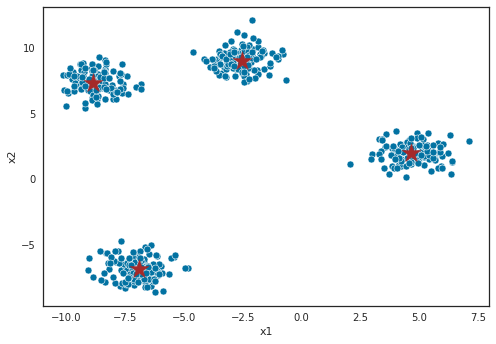

In [45]:
sns.scatterplot(data=df_blobs, x='x1',y='x2')
plt.scatter(data=df_centers, x='x1',y='x2', marker='*', s=400, color='brown')

<AxesSubplot: xlabel='x1', ylabel='x2'>

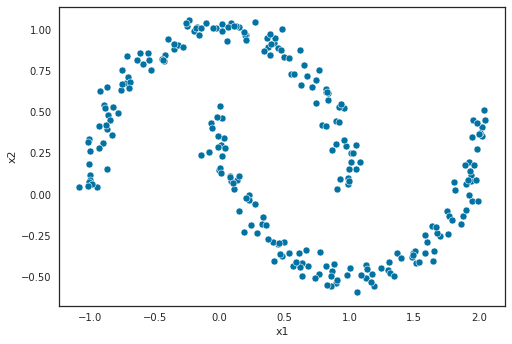

In [46]:
sns.scatterplot(data=df_moons, x='x1',y='x2')

#### Implementando DBSCAN

In [47]:
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict = dbscan_cluster.fit_predict(X_m)
df_moons['cluster'] = y_m_predict
df_moons

,x1,x2,cluster
0,0.084154,0.113341,0
1,1.050915,0.154710,1
2,-0.716555,0.675608,1
3,0.060932,0.926542,1
4,-1.005525,0.336425,1
...,...,...,...
245,-0.929175,0.415625,1
246,0.958694,0.327841,1
247,-0.750714,0.669825,1
248,0.825590,-0.547466,0


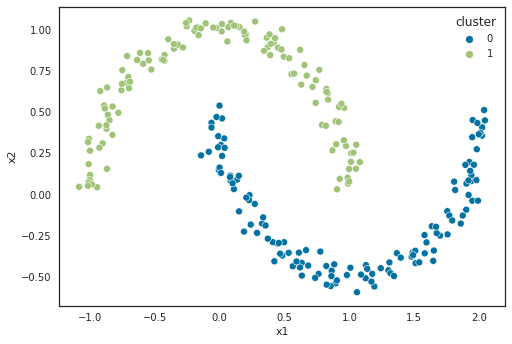

In [48]:
sns.scatterplot(data=df_moons, x='x1',y='x2',hue='cluster');

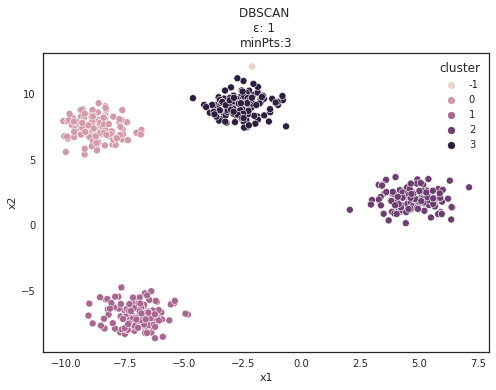

In [49]:
dbscan = DBSCAN(eps=1, min_samples=3)
y_predict = dbscan.fit_predict(X)
df_blobs['cluster'] = y_predict

sns.scatterplot(data=df_blobs, x='x1',y='x2',hue='cluster');
plt.title('''DBSCAN 
ε: 1 
minPts:3''');

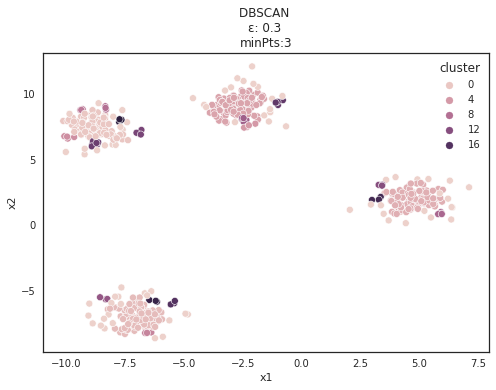

In [50]:
dbscan = DBSCAN(eps=0.3, min_samples=3)
y_predict = dbscan.fit_predict(X)
df_blobs['cluster'] = y_predict
df_blobs

sns.scatterplot(data=df_blobs, x='x1',y='x2',hue='cluster');
plt.title('''DBSCAN 
ε: 0.3 
minPts:3''');

La configuración precisa de los hiperparámetros en DBSCAN es fundamental para obtener resultados de agrupación precisos y significativos. Un valor incorrecto de epsilon o minPts puede llevar a resultados incoherentes. Ajustar los hiperparámetros de acuerdo con los datos y evaluar los resultados es esencial.

#### Encontrar híper-parámetros


In [51]:
from sklearn.neighbors import NearestNeighbors

In [52]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

In [53]:
distances

array([[0.        , 0.10187705, 0.17524267],
       [0.        , 0.62080689, 0.7023487 ],
       [0.        , 0.04394921, 0.59277933],
       ...,
       [0.        , 0.14700045, 0.28342456],
       [0.        , 0.15663647, 0.23884087],
       [0.        , 0.1655336 , 0.17295469]])

In [54]:
indices

array([[  0, 335, 451],
       [  1, 358, 394],
       [  2, 305, 102],
       ...,
       [497,  26, 167],
       [498, 190, 122],
       [499, 187, 461]])

In [55]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

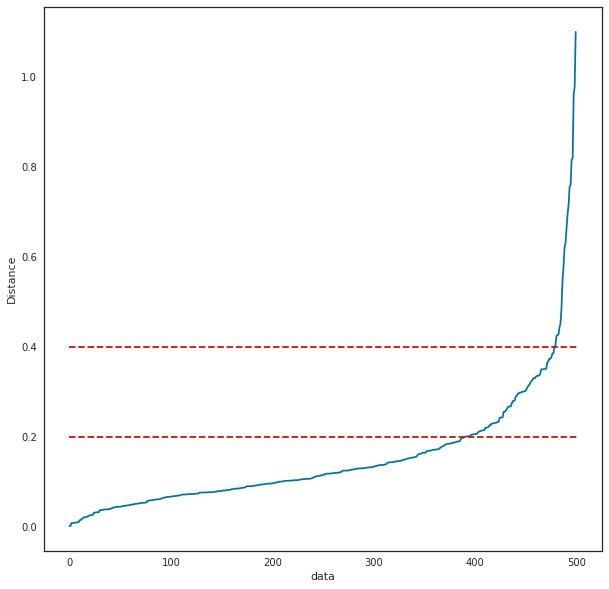

In [56]:
fig = plt.figure(figsize=(10,10))

plt.plot(distances)
plt.xlabel('data')
plt.ylabel('Distance')

plt.hlines(y=0.4 ,xmin=0,xmax=500, linestyles="dashed", colors='r')
plt.hlines(y=0.2 ,xmin=0,xmax=500, linestyles="dashed", colors='r')

plt.show()

In [57]:
eps_values = np.arange(0.25, 0.80, 0.1)
min_samples = np.arange(2,10)

In [58]:
min_samples

array([2, 3, 4, 5, 6, 7, 8, 9])

In [59]:
from itertools import product

In [60]:
dbscan_params = list(product(eps_values, min_samples))
sil_scores = []

for p in dbscan_params:
    y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(X)
    sil_scores.append(silhouette_score(X,y_pred))

In [61]:
df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns=['Eps','Min_Samples'])
df_params_tunning['sil_score'] = sil_scores

In [62]:
pivot_data = pd.pivot_table(df_params_tunning, values='sil_score', index='Min_Samples', columns='Eps')

In [63]:
pivot_data

Eps,0.25,0.35,0.45,0.55,0.65,0.75
Min_Samples,,,,,,
2,-0.046798,0.031230,0.190795,0.386496,0.671273,0.663743
3,-0.123333,0.163150,0.334067,0.514614,0.790896,0.796209
4,-0.155341,0.325637,0.557065,0.756089,0.790265,0.796209
5,-0.189153,0.244688,0.464244,0.746750,0.780621,0.796209
6,-0.315895,0.213551,0.616948,0.710585,0.770446,0.790978
7,-0.429189,0.253837,0.597370,0.692865,0.763602,0.789642
8,-0.526419,0.213737,0.537848,0.679579,0.755964,0.781762
9,-0.662132,0.005024,0.484903,0.667453,0.755964,0.781191


<AxesSubplot: xlabel='Eps', ylabel='Min_Samples'>

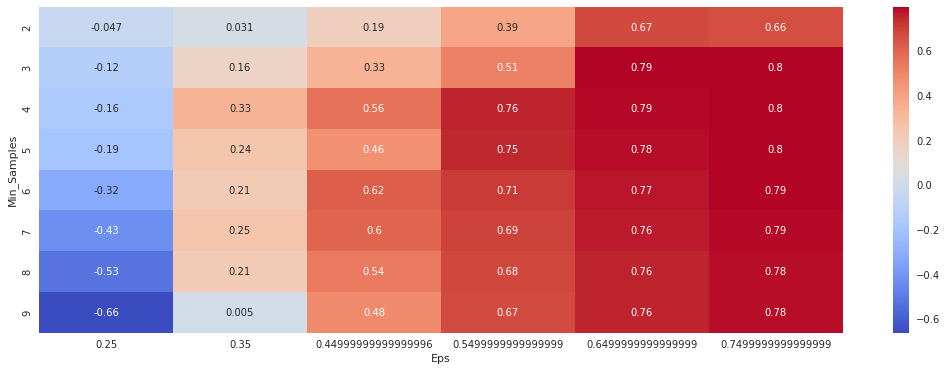

In [64]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size':10}, cmap='coolwarm')

## Evaluando resultados de DBSCAN




In [65]:
dbscan_cluster = DBSCAN(eps=0.8, min_samples=4)
y_predict = dbscan_cluster.fit_predict(X)
df_blobs['cluster'] = y_predict

In [66]:
df_blobs

,x1,x2,cluster
0,-7.918909,6.760982,0
1,-9.037137,-6.923545,3
2,6.391721,1.326531,1
3,-2.822884,7.843474,2
4,-5.918656,-7.206570,3
...,...,...,...
495,-7.718843,8.063230,0
496,-2.570879,9.287208,2
497,-7.148255,-5.544892,3
498,-7.297806,-6.040902,3


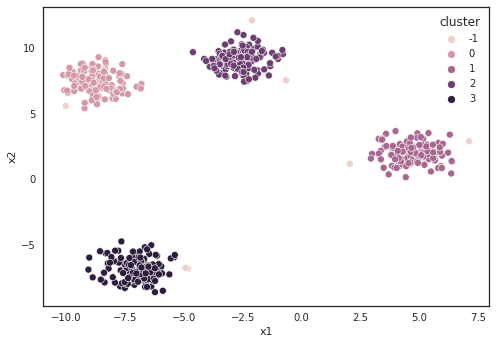

In [67]:
sns.scatterplot(df_blobs, x='x1', y='x2', hue='cluster');

In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_dbscan_cluster(x,eps, min_samples):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(x)
    n_clusters = len(np.unique(cluster_labels))
    
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.



    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i - 1]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x[:, 0], x[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        
    plt.show()

For n_clusters = 5 The average silhouette_score is : 0.796208743013939


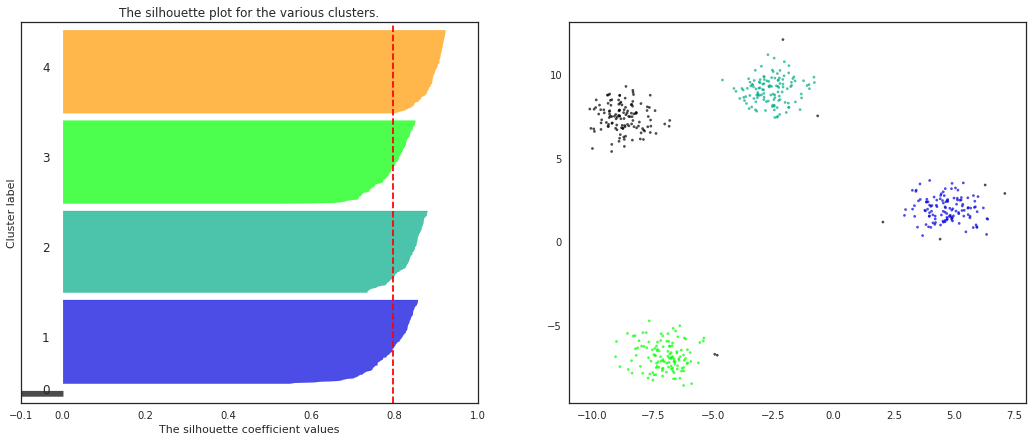

In [69]:
plot_dbscan_cluster(X,eps=0.749,min_samples=5)

# Proyecto: resolviendo un problema con clustering

[Data comes from](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)

## Preparar datos para clusterizar

Antes de abordar un proyecto de clusterización, es fundamental realizar algunas tareas de preprocesamiento de datos comunes en la mayoría de los algoritmos de aprendizaje automático:

- **Eliminar duplicados:** Identificar y eliminar registros duplicados en el conjunto de datos para evitar sesgos y asegurar la integridad de los resultados de la clusterización.

- **Remover columnas innecesarias:** Evaluar y eliminar las columnas que no aportan información relevante para el análisis de clusterización, reduciendo la dimensionalidad y mejorando la eficiencia del algoritmo.

- **Remover outliers:** Identificar y tratar los valores atípicos o extremos que pueden distorsionar los resultados y la estructura de los clusters, para obtener una representación más precisa y coherente de los datos.

- **Escalar los datos:** Asegurarse de que todas las características tengan una escala similar, mediante técnicas de normalización o estandarización, evitando que las características con mayor rango dominen en la formación de clusters.

Estas tareas de preprocesamiento son esenciales para garantizar la calidad y fiabilidad de los resultados de la clusterización, permitiendo obtener agrupaciones más significativas y relevantes en los datos analizados.


### Acerca del proyecto

El objetivo del proyecto es categorizar países utilizando factores socioeconómicos y de salud que determinen el desarrollo general del país. HELP International, una ONG humanitaria internacional, ha recaudado $10 millones y necesita decidir estratégicamente cómo utilizar esos fondos. Como científico de datos, tu tarea es categorizar los países según los factores determinantes y sugerir en qué países debe enfocarse el CEO para brindar ayuda.


### Acerca del dataset

The main dataset containing 167 rows and 10 columns

1. **country:** Name of the country

1. **child_mort:** Death of children under 5 years of age per 1000 live births

1. **exports:** Exports of goods and services per capita. Given as %age of the GDP per capita

1. **health:** Total health spending per capita. Given as %age of GDP per capita

1. **imports:** Imports of goods and services per capita. Given as %age of the GDP per capita

1. **income:** Net income per person

1. **inflation:** The measurement of the annual growth rate of the Total GDP

1. **life_expec:** The average number of years a new born child would live if the current mortality patterns are to remain the same

1. **total_fer:** The number of children that would be born to each woman if the current age-fertility rates remain the same.

1. **gdpp:** The GDP per capita. Calculated as the Total GDP divided by the total population.

### Importar librería 

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style='whitegrid')

### Carga de datos

In [71]:
df_country = pd.read_csv('./Country-data.csv')
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [72]:
df_country.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


### Manejo de valores nulos

In [73]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Validando duplicados

In [74]:
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


### Análisis de distribucion

In [75]:
int_cols = df_country.select_dtypes(exclude='object').columns
int_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [76]:
for i,cols in enumerate(int_cols):
    print(cols)

child_mort
exports
health
imports
income
inflation
life_expec
total_fer
gdpp


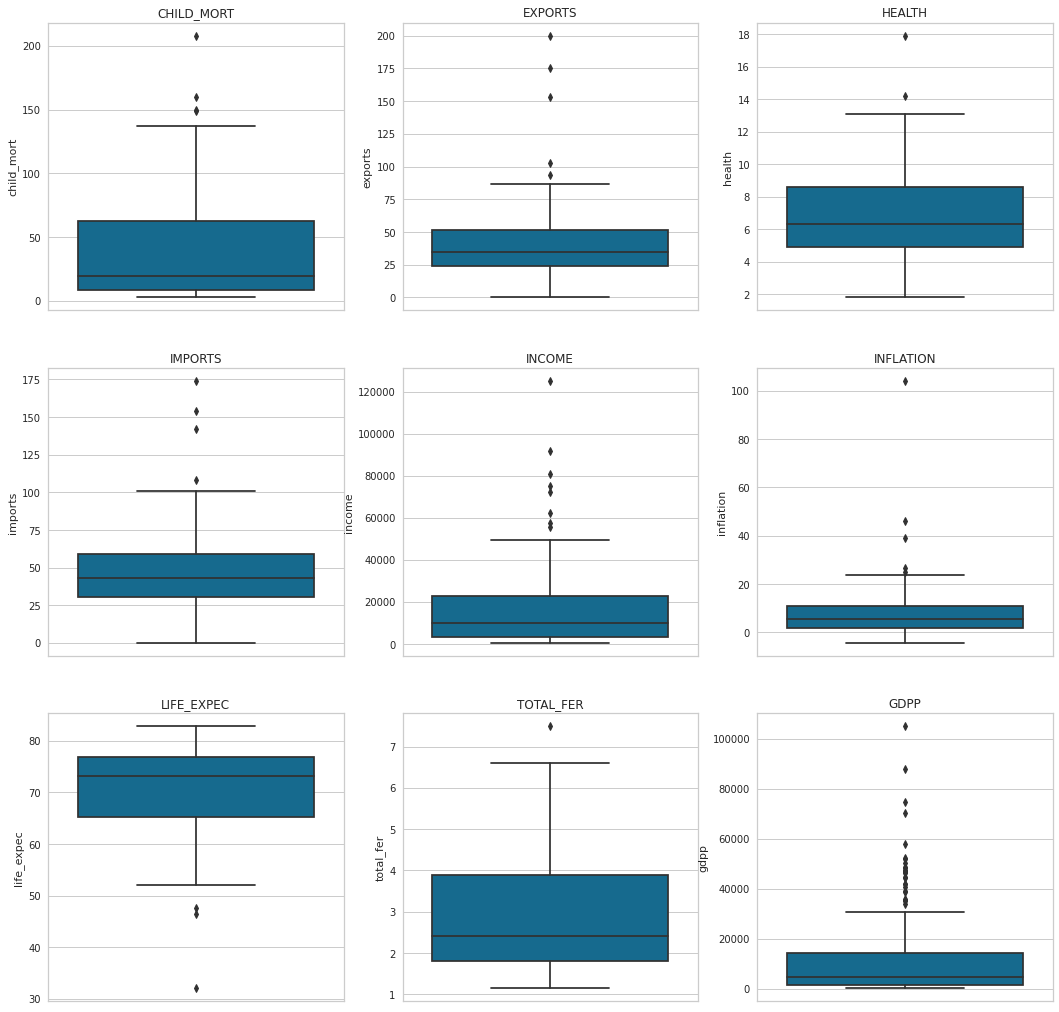

In [77]:
fig, axs = plt.subplots(3,3,figsize=(18,18))
for i,cols in enumerate(int_cols):
    fila = i // 3  # Calcular la fila correspondiente
    columna = i % 3  # Calcular la columna correspondiente

    sns.boxplot(data=df_country,y=cols, ax=axs[fila, columna])
    axs[fila, columna].set_title(f'{cols.upper()}')

#### Insights


Durante el análisis de las distribuciones mediante boxplots de las variables en el dataset "Unsupervised Learning on Country Data", se descubrieron los siguientes insights:

- Se identificaron varios outliers en las distribuciones de las variables.

- Específicamente, se destacó un outlier en la variable de inflación.

- A pesar de la presencia de outliers, se decidió no eliminarlos en este caso.

- Los outliers en la variable de inflación son parte de los datos económicos de cada país y no pueden ser descartados.

- Estos datos representan aspectos fundamentales de la economía y no surgieron de la nada.

- La decisión de no eliminar los outliers resalta la importancia de comprender y analizar adecuadamente el contexto y la naturaleza de los datos antes de realizar cualquier modificación.

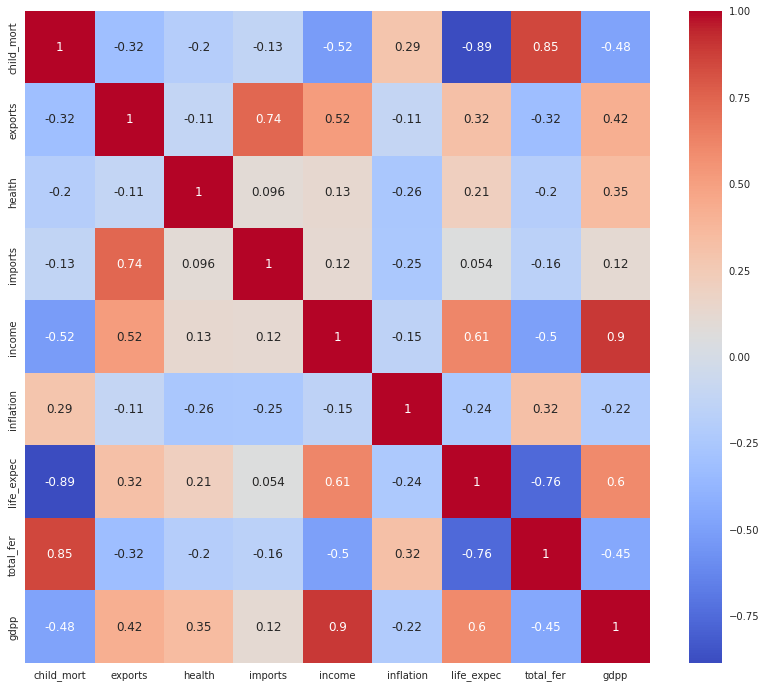

In [78]:
plt.figure(figsize=(14,12))

sns.heatmap(
    df_country.select_dtypes(exclude='object').corr(),
    annot=True,
    cmap='coolwarm');

#### Insights

- Existe una **alta correlación positiva de 0.90** entre el **ingreso per cápita (income) y el producto interno bruto per cápita (gdpp).**
- Se observa una **alta correlación negativa de -0.89** entre la **esperanza de vida (life_expec) y la tasa de mortalidad infantil (child_mort).**
- Se encontró una **alta correlación positiva de 0.85** entre la **tasa de mortalidad infantil (child_mort) y la fertilidad total (total_fer).**
- Se observa una **alta correlación negativa de -0.76** entre la **esperanza de vida (life_expec) y la fertilidad total (total_fer).**
- Existe una **correlación moderada de 0.61** entre el **ingreso per cápita (income) y la esperanza de vida (life_expec).**
- Se encontró una **correlación moderada de 0.60** entre el **producto interno bruto per cápita (gdpp) y la esperanza de vida (life_expec).**
- Existe una **alta correlación positiva de 0.74** entre las **exportaciones (exports) e importaciones (imports).**

Conclusiones:

- La correlación positiva entre el ingreso per cápita **(income)** y el producto interno bruto per cápita **(gdpp)** respalda la idea de que un mayor ingreso económico está asociado con un mayor desarrollo económico.
- La alta correlación negativa entre la esperanza de vida **(life_expec)** y la tasa de mortalidad infantil **(child_mort)** sugiere que los países con mejores condiciones de salud tienen una menor tasa de mortalidad infantil.
- La correlación positiva entre la tasa de mortalidad infantil **(child_mort)** y la fertilidad total **(total_fer)** indica que los países con altas tasas de fertilidad total pueden enfrentar desafíos en la salud y el bienestar infantil.
- La alta correlación negativa entre la esperanza de vida **(life_expec)** y la fertilidad total **(total_fer)** sugiere que una menor fertilidad total puede estar relacionada con una mayor atención médica y una mejor calidad de vida.
- Las correlaciones moderadas entre el ingreso per cápita **(income)** y la esperanza de vida **(life_expec)**, así como entre el producto interno bruto per cápita **(gdpp)** y la esperanza de vida **(life_expec)**, indican que un mayor nivel de desarrollo económico puede estar asociado con una mayor esperanza de vida.
- La alta correlación positiva entre las exportaciones **(exports)** e importaciones **(imports)** indica la interdependencia y el flujo de bienes en el comercio internacional.


### Escalar datos

Escalar los datos antes del PCA mejora su rendimiento y precisión al igualar las magnitudes de las variables, lo que garantiza una contribución equitativa y una mejor captura de las variaciones relevantes.

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_country_scaled = scaler.fit_transform(df_country.drop('country', axis=1))

In [80]:
df_country_scaled = pd.DataFrame(
    df_country_scaled, 
    columns=df_country.drop('country', axis=1).columns)

In [81]:
df_country_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


### PCA

La reducción de dimensionalidad en la preparación de datos es importante para simplificar y agilizar el análisis. Ayuda a eliminar características redundantes y poco informativas, lo que mejora la eficiencia y evita el sobreajuste. Al aplicar técnicas como PCA o LDA, se conserva la información clave en un espacio de menor dimensión.

In [82]:
from sklearn.decomposition import PCA

In [83]:
pca = PCA()
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pd.DataFrame(pca_data_scaled)

,0,1,2,3,4,5,6,7,8
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0.415076,-0.014148
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,-0.221042,0.173316
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,-0.184162,0.084037
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,-0.355998,-0.091339
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,-0.023681,0.094270
...,...,...,...,...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,0.009059,-0.098738,0.521886,-0.497803
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581,0.097274,0.206735,-0.078805,-0.275735
164,0.498524,1.390744,-0.238526,-1.074098,1.176081,0.051607,-0.143627,-0.217590,-0.036522
165,-1.887451,-0.109453,1.109752,0.056257,0.618365,-0.540917,0.060256,0.089495,-0.096049


In [84]:
# Calcular la varianza explicada por cada componente principal
var = pca.explained_variance_ratio_  
var

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [85]:
# Calcular la varianza acumulada
cum_var = np.cumsum(np.round(var, decimals=4))*100  

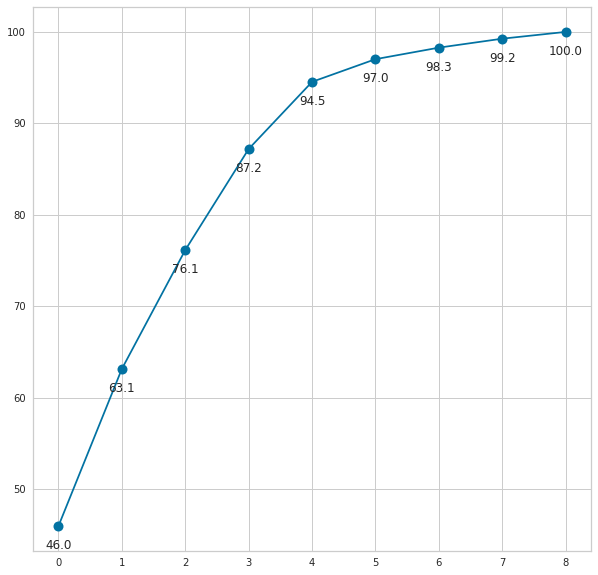

In [86]:
plt.figure(figsize=(10,10))

# Crear una gráfica de  para visualizar la varianza acumulada y marcar los puntos con estrellas rojas
plt.plot(cum_var, marker='o', markersize=10, color='b')

# Etiquetar el valor de la varianza acumulada en los puntos correspondientes
for i, ix in enumerate(cum_var):
    plt.annotate(np.round(ix, decimals=1), xy=(i, ix-2.5), ha='center')

Al observar el gráfico, vemos que al seleccionar 4 variables del PCA, capturamos un 87.2% de la información total. Esta elección nos permitira simplificar el análisis sin perder información esencial.

In [87]:
pca_data_standar = pd.DataFrame(pca_data_scaled)
pca_data_standar.drop([4,5,6,7,8],axis=1,inplace=True)  

In [88]:
pca_data_standar

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


TSN-E

In [366]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_data_scaled = tsne.fit_transform(df_country_scaled)


/home/mazzaroli/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/mazzaroli/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



### Importar librería para clustering

In [89]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

### K-means

In [90]:
def plot_elbow_silhouette(K, values, title, ax):
    """
    Traces an elbow plot or a silhouette coefficient plot based on the number of clusters.
    
    Parameters:
    - K: A list or range of values representing the number of clusters.
    - values: A list of values corresponding to the y-axis of the plot.
    - title: The title of the plot.
    - ax: The matplotlib axes object on which the plot will be drawn.
    """

    sns.lineplot(ax=ax, x=K, y=values, linestyle='dashed', marker='o', markersize=10, color='b')
    ax.set_xlabel('K')
    ax.set_ylabel('Inertia' if 'WCSS' in title else 'Silhouette Coefficient')
    ax.set_title(title, size=15)

In [91]:

def analyze_cluster(data):  
    """
    Performs a cluster analysis using the K-Means algorithm.
    
    Parameters:
    - data: The data on which the clustering analysis will be performed.
    
    Returns:
    - sum_of_squared_distances: A list of the sum of squared distances for each number of clusters.
    - silhouette_scores: A list of the silhouette coefficients for each number of clusters.
    """
    sum_of_squared_distances = []
    silhouette_scores = []
    K = range(2, 15)
    
    for k in K:
        km = KMeans(n_clusters=k,random_state=42)
        y = km.fit_predict(data)
        sum_of_squared_distances.append(km.inertia_)
        silhouette_scores.append(silhouette_score(data, y))
    
    return sum_of_squared_distances, silhouette_scores

In [92]:
def plot_cluster_elbow_silhouette(data, title, axes, row, col):
    """
    Plot the elbow plots for WCSS and silhouette coefficients.
    
    Parameters:
    - data: The data on which the clustering analysis will be performed.
    - title: The title of the analysis. (PCA | No PCA)
    - axes: The matplotlib axes grid on which the plots
    - row: The row index of the current subplot.
    - col: The column index of the current subplot.
    """
    
    elbow, silhouette = analyze_cluster(data)
    
    plot_elbow_silhouette(K, elbow, f'Elbow Method WCSS ({title})', axes[row, col])
    plot_elbow_silhouette(K, silhouette, f'Elbow Method Silhouette Coefficient ({title})', axes[row, col + 1])

In [93]:

def calculate_and_assign_clusters(data, title, df, k):
    """
    Calculates clusters using the K-Means algorithm and assigns the cluster labels to a DataFrame.
    
    Parameters:
    - data: The data on which the clustering analysis will be performed.
    - title: The title of the analysis. (PCA | No PCA)
    - df: The DataFrame to which the cluster labels will be assigned.
    - k: The number of clusters to be generated by the K-Means algorithm.
    """
    km = KMeans(n_clusters=k, random_state=42)
    y = km.fit_predict(data)
    print('silhouette_score', title, ':', silhouette_score(data, y))
    
    if title == 'No PCA':
        df['k_means'] = y
    else:
        df['k_means_pca'] = y

In [310]:
score = pd.DataFrame([])

def calculate_and_assign_clusters(data: pd.DataFrame=None, method: str=None, title: str=None, df: pd.DataFrame=None, k: int=None, eps: float=None, min_samples: int=None):
    """
    Calculates clusters using the specified algorithm and assigns the cluster labels to a DataFrame.

    Parameters:
    - data: The data on which the clustering analysis will be performed.
    - method: The clustering algorithm to be used ('kmeans', 'hierarchical', or 'dbscan').
    - title: The title of the analysis ('PCA', 'No PCA' or 'TSNE).
    - df: The DataFrame to which the cluster labels will be assigned.
    - k: The number of clusters to be generated (applicable for 'kmeans' and 'hierarchical').
    - eps: The maximum distance between two samples for them to be considered in the same neighborhood (applicable for 'dbscan').
    - min_samples: The number of samples in a neighborhood for a point to be considered as a core point (applicable for 'dbscan').
    """

    if method == 'kmeans':
        # Perform K-Means clustering
        km = KMeans(n_clusters=k, random_state=42)
        y = km.fit_predict(data)

        if title == 'No PCA':
            df['k_means'] = y
        if title == "TSNE":
            df['k_means_tsne'] = y
        else:
            df['k_means_pca'] = y

    elif method == 'hierarchical':
        # Perform hierarchical clustering
        hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
        y = hc.fit_predict(data)
        if title == 'No PCA':
            df['hc'] = y
        if title == "TSNE":
            df['hc_tsne'] = y
        else:
            df['hc_pca'] = y

    elif method == 'dbscan':
        # Perform DBSCAN clustering
        dbscan_train = DBSCAN(eps=eps, min_samples=min_samples)
        y = dbscan_train.fit_predict(data)
        if title == 'No PCA':
            df['dbscan'] = y
        if title == "TSNE":
            df['dbscan_tsne'] = y
        else:
            df['dbscan_pca'] = y

    # Calculate and print the silhouette score
    print('silhouette_score', title, ':', silhouette_score(data, y))

    score[method + '' + title] = [silhouette_score(data, y)]
    

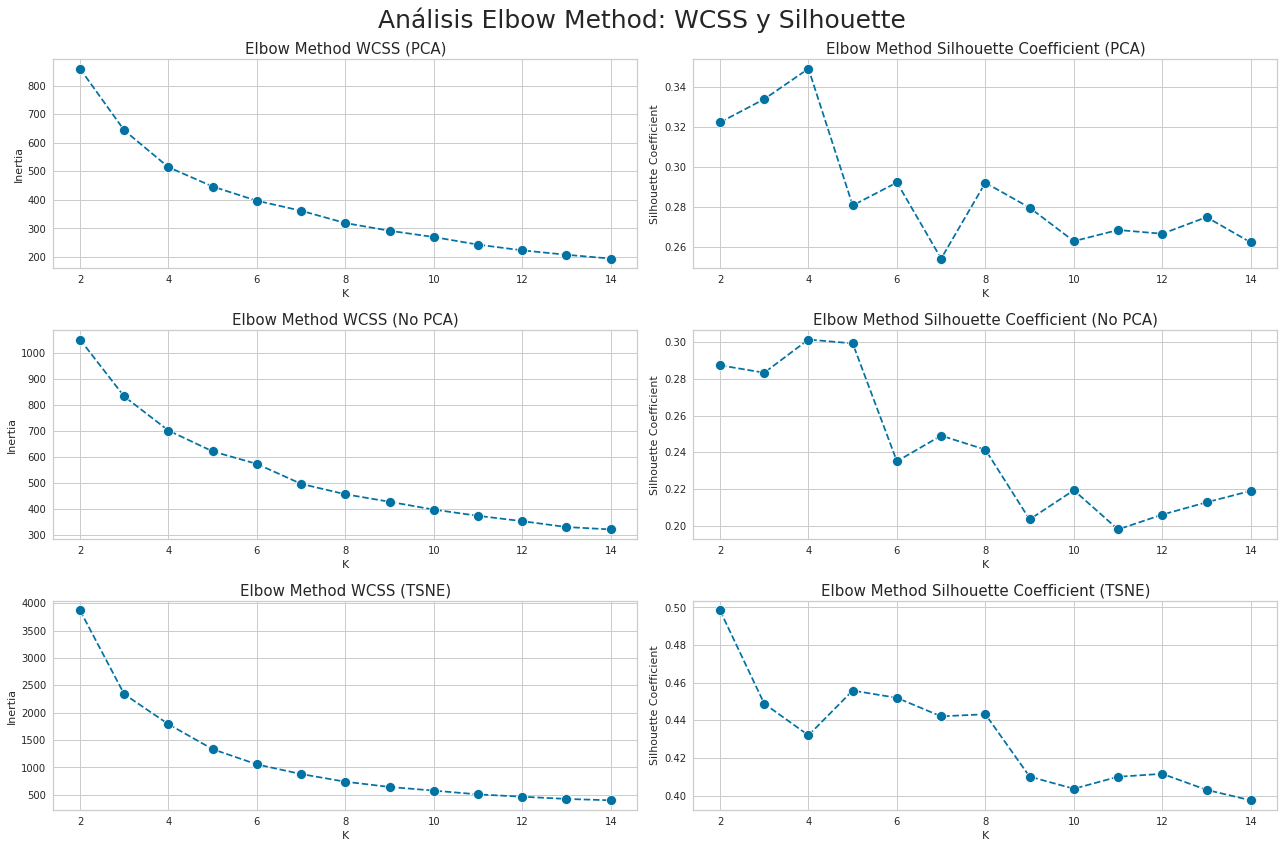

In [370]:
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# Elbow Method with PCA
plot_cluster_elbow_silhouette(pca_data_standar, 'PCA', axes, 0, 0)

# Elbow Method without PCA
plot_cluster_elbow_silhouette(df_country_scaled, 'No PCA', axes, 1, 0)

plot_cluster_elbow_silhouette(tsne_data_scaled, 'TSNE', axes, 2, 0)

plt.suptitle('Análisis Elbow Method: WCSS y Silhouette', size=25)
plt.tight_layout()
plt.show()

Al analizar los resultados de los gráficos de silueta con el método WCSS en TSNE, PCA y sin PCA, se observó que el codo se encontraba entre 4 y 6 clusters. Sin embargo, el análisis de coeficiente de silueta reveló que se obtenía el porcentaje más alto cuando se utilizaban 4 clusters.

In [368]:
kmeans_pca_score = calculate_and_assign_clusters(pca_data_standar,'kmeans','PCA',df_country,4)
kmeans_score = calculate_and_assign_clusters(df_country_scaled,'kmeans','TSNE',df_country,4)
kmeans_score = calculate_and_assign_clusters(df_country_scaled,'kmeans','No PCA',df_country,4)

silhouette_score PCA : 0.34930392685434886
silhouette_score TSNE : 0.301375962376881
silhouette_score No PCA : 0.301375962376881


In [244]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,hc_tsne,dbscan_pca,dbscan
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1,0,0,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0,0,0,0,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0,0,0,0,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1,0,0,0,-1,-1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0,0,0,0,1,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0,0,0,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0,0,0,1,1,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,1,0,0,0,0,0


### Hierarchical Clustering 

PCA

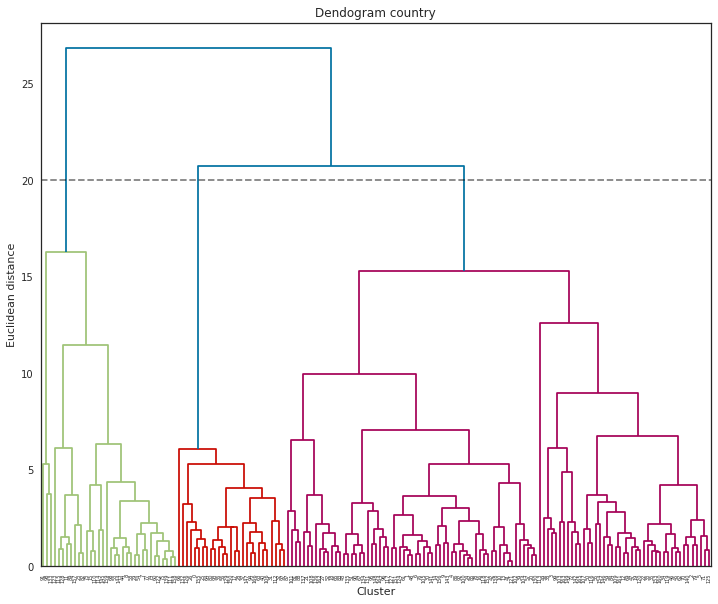

In [245]:
fig = plt.figure(figsize=(12,10))
sns.set_style('white')
dendrogram_plot = dendrogram(linkage(pca_data_scaled, method='ward'))

plt.title('Dendogram country')
plt.xlabel('Cluster')
plt.ylabel('Euclidean distance')
for i in [80,45,20]:
    plt.hlines(y=i,xmin=0,xmax=5000,linestyles='dashed', alpha=.5, colors='black')

plt.show()

sns.set_style('whitegrid')

In [246]:
for i in range(2,7):
    hc = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    y_hc = hc.fit_predict(pca_data_scaled)
    print(f'{i}_cluster :',silhouette_score(pca_data_scaled, y_hc))


2_cluster : 0.3153134331018189
3_cluster : 0.24563001303300652
4_cluster : 0.2481189184769207
5_cluster : 0.2193301598939687
6_cluster : 0.21767498054879106


In [312]:
calculate_and_assign_clusters(pca_data_scaled,'hierarchical','PCA',df_country,2)

silhouette_score PCA : 0.3153134331018189


Sin PCA

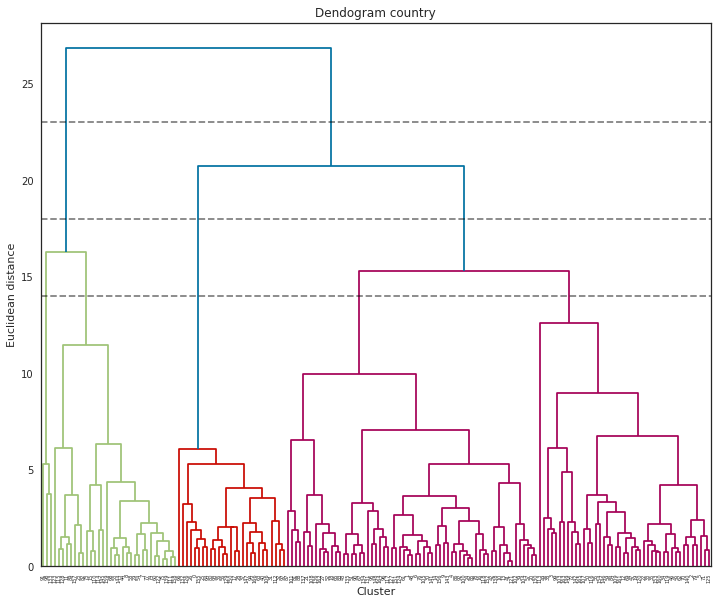

In [248]:
fig = plt.figure(figsize=(12,10))
sns.set_style('white')
dendrogram_plot = dendrogram(linkage(df_country_scaled, method='ward'))

plt.title('Dendogram country')
plt.xlabel('Cluster')
plt.ylabel('Euclidean distance')
for i in [23,18,14]:
    plt.hlines(y=i,xmin=0,xmax=5000,linestyles='dashed', alpha=.5, colors='black')

plt.show()

sns.set_style('whitegrid')

In [249]:
for i in range(2,7):
    hc = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    y_hc = hc.fit_predict(df_country_scaled)
    print(f'{i}_cluster :',silhouette_score(df_country_scaled, y_hc))

2_cluster : 0.3153134331018189
3_cluster : 0.24563001303300652
4_cluster : 0.24811891847692066
5_cluster : 0.2193301598939687
6_cluster : 0.217674980548791


In [313]:
hc_score = calculate_and_assign_clusters(df_country_scaled,'hierarchical','No PCA',df_country,2)

silhouette_score No PCA : 0.3153134331018189


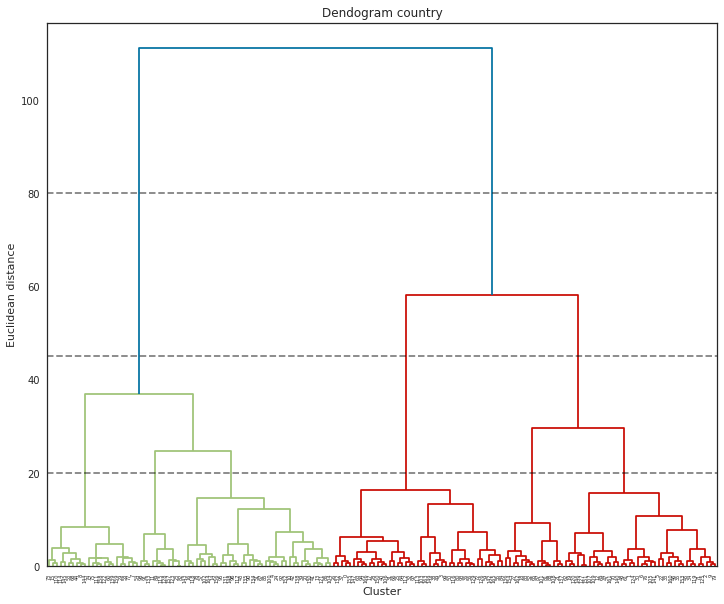

In [252]:
fig = plt.figure(figsize=(12,10))
sns.set_style('white')
dendrogram_plot = dendrogram(linkage(tsne_data_scaled, method='ward'))

plt.title('Dendogram country')
plt.xlabel('Cluster')
plt.ylabel('Euclidean distance')
for i in [80,45,20]:
    plt.hlines(y=i,xmin=0,xmax=5000,linestyles='dashed', alpha=.5, colors='black')

plt.show()

sns.set_style('whitegrid')

In [253]:
for i in range(2,7):
    hc = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    y_hc = hc.fit_predict(tsne_data_scaled)
    print(f'{i}_cluster :',silhouette_score(tsne_data_scaled, y_hc))

2_cluster : 0.469112
3_cluster : 0.42755437
4_cluster : 0.4256879
5_cluster : 0.44128564
6_cluster : 0.46032542


In [314]:
calculate_and_assign_clusters(tsne_data_scaled,'hierarchical','TSNE',df_country,2,None,None)


silhouette_score TSNE : 0.469112


In [255]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,hc_tsne,dbscan_pca,dbscan
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1,0,0,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0,0,0,0,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0,0,0,0,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1,0,0,0,-1,-1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0,0,0,0,1,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0,0,0,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0,0,0,1,1,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,1,0,0,0,0,0


### DBSCAN


#### PCA

In [256]:
from sklearn.neighbors import NearestNeighbors
# Crear una instancia del modelo NearestNeighbors con n_neighbors=2
neighbors = NearestNeighbors(n_neighbors=2)

# Ajustar el modelo NearestNeighbors utilizando los datos transformados mediante PCA
neighbors_fit = neighbors.fit(pca_data_standar)

# Calcular las distancias y los índices de los vecinos más cercanos
distances, indices = neighbors_fit.kneighbors(pca_data_standar)

In [257]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

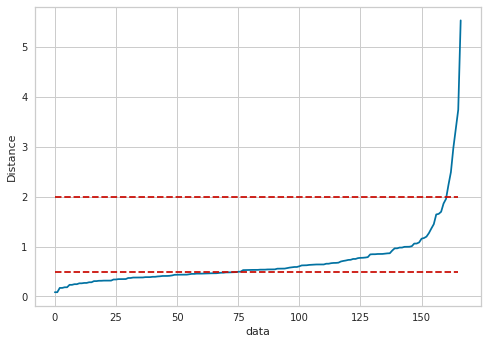

In [258]:
plt.plot(distances)

plt.xlabel('data')
plt.ylabel('Distance')

plt.hlines(y=2 ,xmin=0,xmax=165, linestyles="dashed", colors='r')
plt.hlines(y=0.5 ,xmin=0,xmax=165, linestyles="dashed", colors='r')

Exploramos el rango de 0.5 a 2 en el gráfico de rodilla para encontrar el mejor valor de epsilon. Este valor óptimo nos permite identificar cambios importantes en las distancias y optimizar el algoritmo de clustering con DBSCAN.

In [259]:
# Crear un arreglo de valores de epsilon desde 0.5 hasta 2 con paso de 0.1
eps_values = np.arange(0.5, 2, 0.1)

# Crear un arreglo de valores de min_samples desde 3 hasta 12
min_samples = np.arange(3, 12)

In [260]:
from itertools import product

# Generar todas las combinaciones posibles entre los valores de eps_values y min_samples
dbscan_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_scores = []

for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standar)
    try:
        sil_scores.append(silhouette_score(pca_data_standar, y_dbscan))
    except:
        sil_scores.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [261]:
df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns=['Eps','Min_samples'])
df_params_tunning['sil_score'] = sil_scores
df_params_tunning['n_clusters'] = no_of_clusters

In [262]:
df_params_tunning

,Eps,Min_samples,sil_score,n_clusters
0,0.5,3,-0.290614,8
1,0.5,4,-0.346912,8
2,0.5,5,-0.270847,3
3,0.5,6,-0.270847,3
4,0.5,7,-0.192021,2
...,...,...,...,...
130,1.9,7,0.508155,2
131,1.9,8,0.508155,2
132,1.9,9,0.508155,2
133,1.9,10,0.490310,2


In [263]:
pivot_1 = pd.pivot_table(df_params_tunning, values='sil_score', columns='Eps', index='Min_samples')

pivot_2 = pd.pivot_table(df_params_tunning, values='n_clusters', columns='Eps', index='Min_samples')

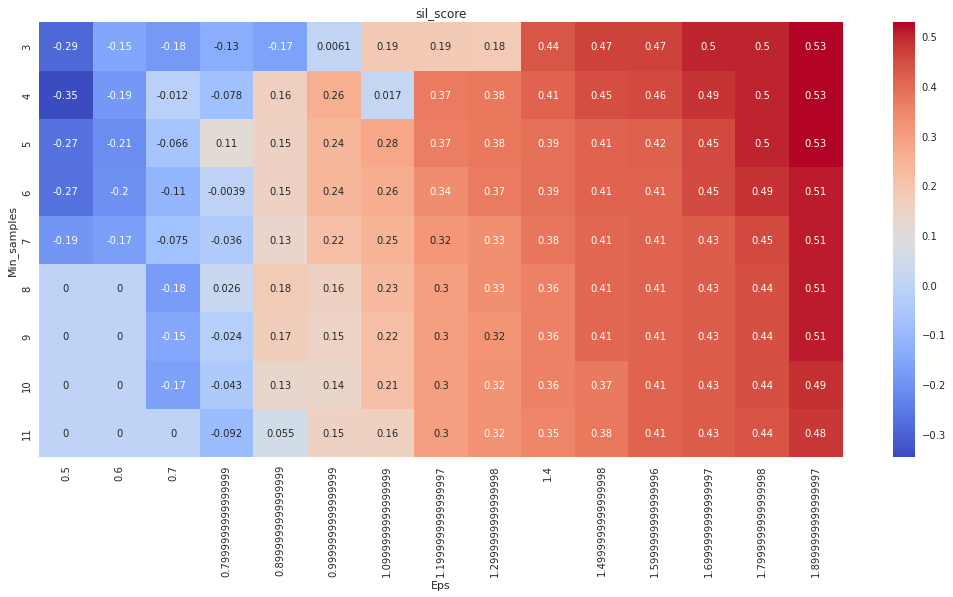

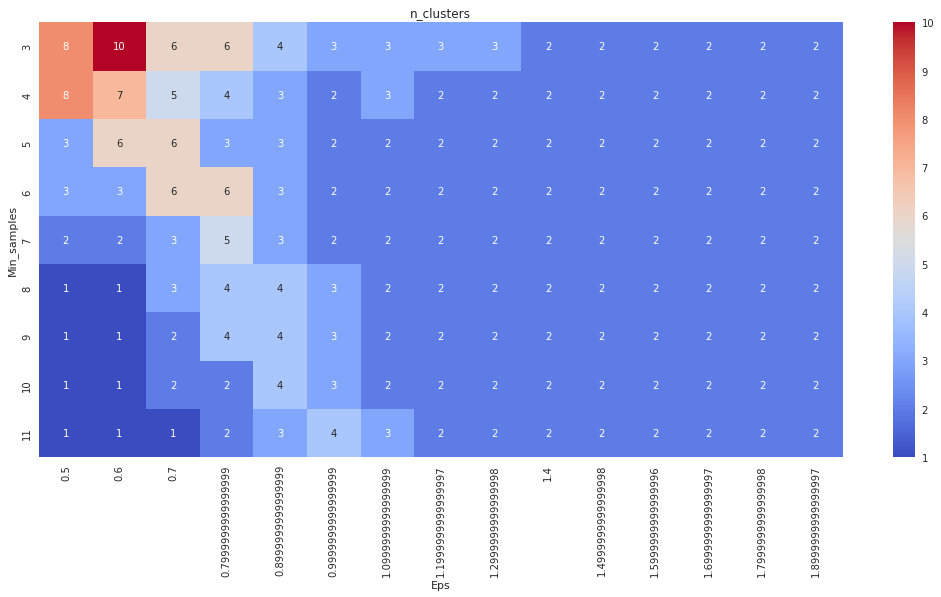

In [264]:
plt.figure(figsize=(18,8))
sns.heatmap(pivot_1,annot=True, annot_kws={'size':10}, cmap='coolwarm');
plt.title('sil_score')
plt.show()

plt.figure(figsize=(18,8))
sns.heatmap(pivot_2,annot=True, annot_kws={'size':10}, cmap='coolwarm');
plt.title('n_clusters')
plt.show()


En el análisis de los gráficos:

- El **gráfico de sil_score** indica que un **Eps de 1.89** tiene un **alto índice de silueta**, lo que sugiere buena calidad de los clusters.

- Sin embargo, el **gráfico de n_clusters** muestra que el **número de clusters es bajo**, posiblemente con solo **1 cluster y outliers**.

- Esta discrepancia indica que la configuración con Eps de 1.89 no sería útil para la predicción, a pesar del alto índice de silueta.

- Por otro lado, con un **Eps de 1.19**, se obtiene un **índice de silueta de 0.18** y se observan **3 clusters** en el gráfico de n_clusters.

- Esta configuración parece más adecuada, con un número razonable de clusters y un índice de silueta aceptable.

In [315]:
dbscan_pca_score = calculate_and_assign_clusters(
    data=pca_data_standar,
    method='dbscan',
    title='PCA',
    df=df_country,
    eps=1.2,
    min_samples=3)

silhouette_score PCA : 0.18591175730784343


#### Sin PCA

In [266]:
from sklearn.neighbors import NearestNeighbors
# Crear una instancia del modelo NearestNeighbors con n_neighbors=2
neighbors = NearestNeighbors(n_neighbors=2)

# Ajustar el modelo NearestNeighbors utilizando los datos transformados mediante PCA
neighbors_fit = neighbors.fit(df_country_scaled)

# Calcular las distancias y los índices de los vecinos más cercanos
distances, indices = neighbors_fit.kneighbors(df_country_scaled)

In [267]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

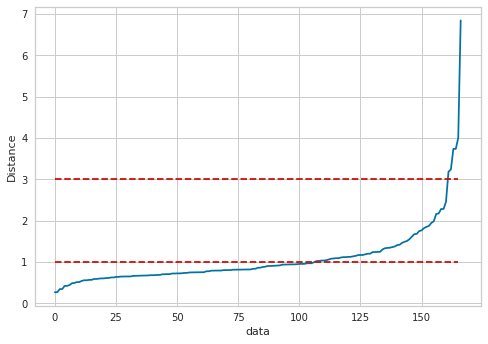

In [268]:
plt.plot(distances)

plt.xlabel('data')
plt.ylabel('Distance')

plt.hlines(y=3 ,xmin=0,xmax=165, linestyles="dashed", colors='r')
plt.hlines(y=1 ,xmin=0,xmax=165, linestyles="dashed", colors='r')

Al realizar el algoritmo de DBSCAN en el dataset sin aplicar PCA, observamos en nuestro **gráfico de rodilla** que los datos varían en un **rango de 1 a 3**. Esto indica que existe una posible variación en el número de clusters óptimos dentro de ese rango. Por lo tanto, debemos considerar diferentes valores de **Eps** y **min_samples** dentro de ese rango basado en el orden de las distancias.

In [269]:
# Crear un arreglo de valores de epsilon desde 0.5 hasta 2 con paso de 0.1
eps_values = np.arange(1, 3, 0.1)

# Crear un arreglo de valores de min_samples desde 3 hasta 12
min_samples = np.arange(3, 12)

In [270]:
from itertools import product

# Generar todas las combinaciones posibles entre los valores de eps_values y min_samples
dbscan_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_scores = []

for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_country_scaled)
    try:
        sil_scores.append(silhouette_score(df_country_scaled, y_dbscan))
    except:
        sil_scores.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [271]:
df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns=['Eps','Min_samples'])
df_params_tunning['sil_score'] = sil_scores
df_params_tunning['n_clusters'] = no_of_clusters

In [272]:
df_params_tunning

,Eps,Min_samples,sil_score,n_clusters
0,1.0,3,0.011714,7
1,1.0,4,-0.031864,5
2,1.0,5,-0.024819,4
3,1.0,6,0.009157,3
4,1.0,7,-0.020091,3
...,...,...,...,...
175,2.9,7,0.557682,2
176,2.9,8,0.557682,2
177,2.9,9,0.557682,2
178,2.9,10,0.557682,2


In [273]:
pivot_1 = pd.pivot_table(df_params_tunning, values='sil_score', columns='Eps', index='Min_samples')

pivot_2 = pd.pivot_table(df_params_tunning, values='n_clusters', columns='Eps', index='Min_samples')

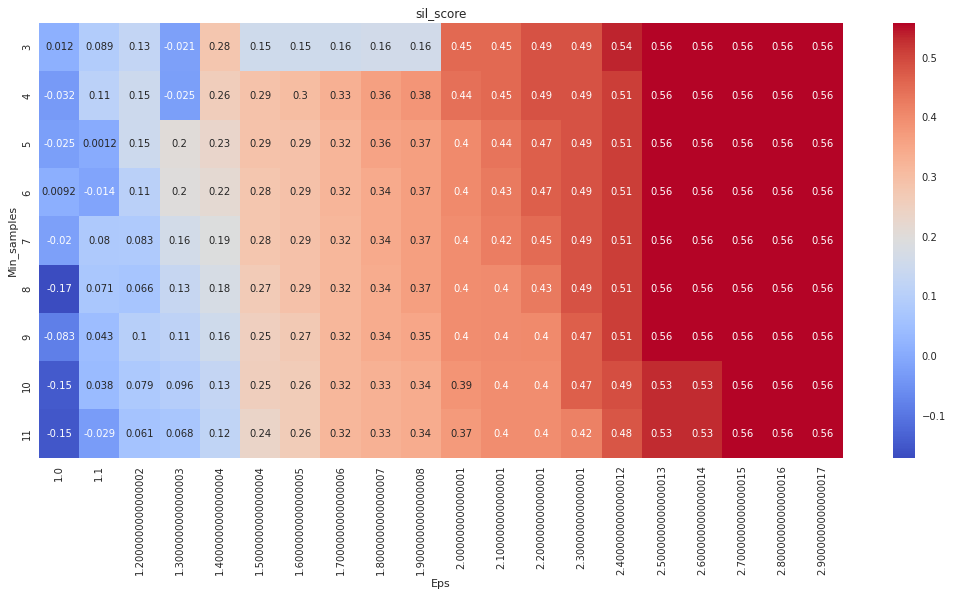

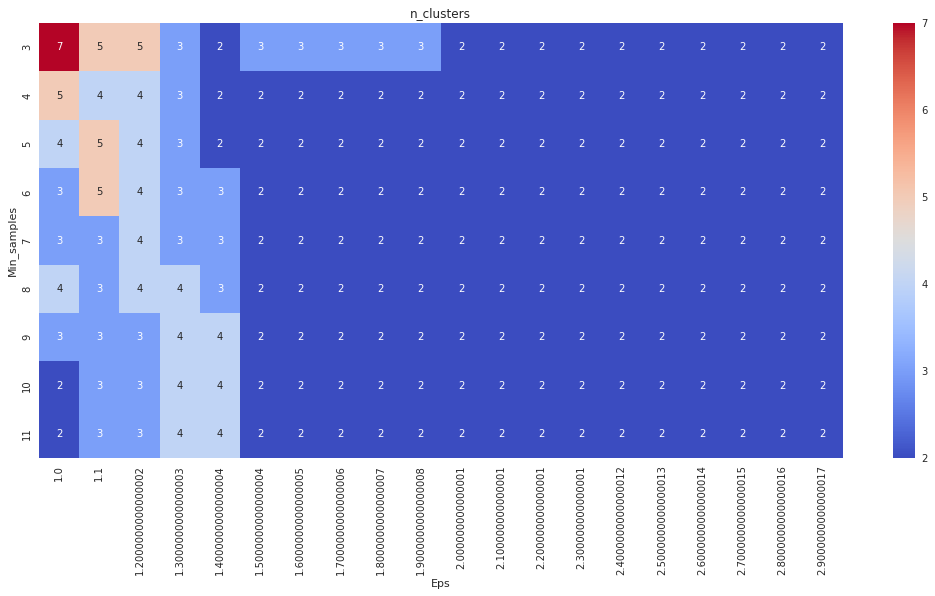

In [274]:
plt.figure(figsize=(18,8))
sns.heatmap(pivot_1,annot=True, annot_kws={'size':10}, cmap='coolwarm');
plt.title('sil_score')
plt.show()

plt.figure(figsize=(18,8))
sns.heatmap(pivot_2,annot=True, annot_kws={'size':10}, cmap='coolwarm');
plt.title('n_clusters')
plt.show()

In [390]:
dbscan_score = calculate_and_assign_clusters(
    data=df_country_scaled,
    method='dbscan',
    title='No PCA',
    df=df_country,
    eps=1.4,
    min_samples=6)

silhouette_score No PCA : 0.21539651251091044


In [391]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,hc_tsne,dbscan_pca,dbscan,k_means_tsne
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1,0,0,0,0,0,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0,0,0,0,1,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0,0,0,0,1,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1,0,0,0,-1,-1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0,0,0,0,1,1,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0,0,0,0,-1,-1,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0,0,0,1,1,1,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,1,0,0,0,0,0,1


### Evaluacion de resultados

In [392]:
score.values

array([[0.34930393, 0.30137596, 0.31531343, 0.31531343, 0.46911201,
        0.18591176, 0.21539651, 0.30137596]])

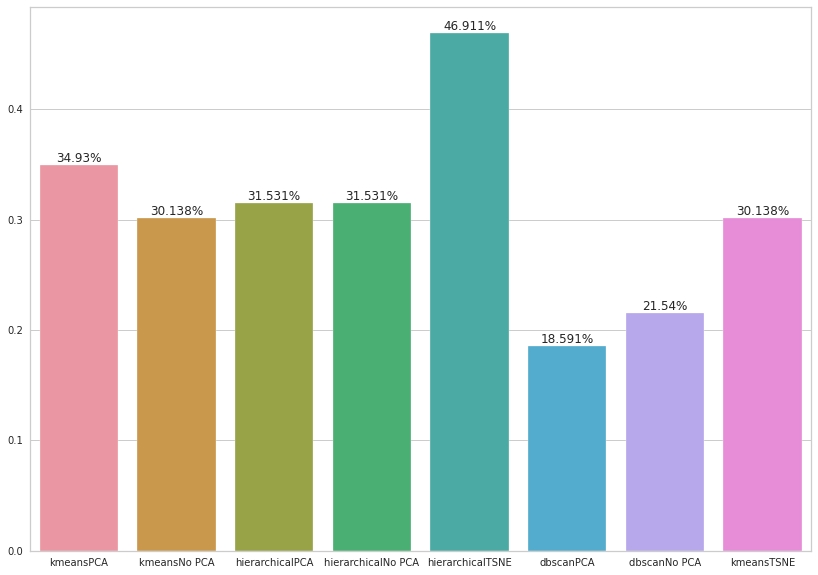

In [395]:
plt.figure(figsize=(14,10))
sns.barplot(score)

for i, value in enumerate(score.values[0]):
    plt.annotate(str(f'{(value*100).round(3)}%'), xy=(i, value), ha='center', va='bottom')

Se encontró que el método K-means con el dataset reducido mediante PCA obtuvo una precisión del 34.94%, mientras que el método jerárquico con el dataset reducido mediante t-SNE logró una precisión del 46.91%. Esto sugiere que el enfoque jerárquico con t-SNE puede ser más efectivo para capturar las similitudes entre los datos en comparación con el método K-means y PCA.

In [278]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca',
       'k_means', 'hc_pca', 'hc', 'hc_tsne', 'dbscan_pca', 'dbscan'],
      dtype='object')

In [279]:
df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


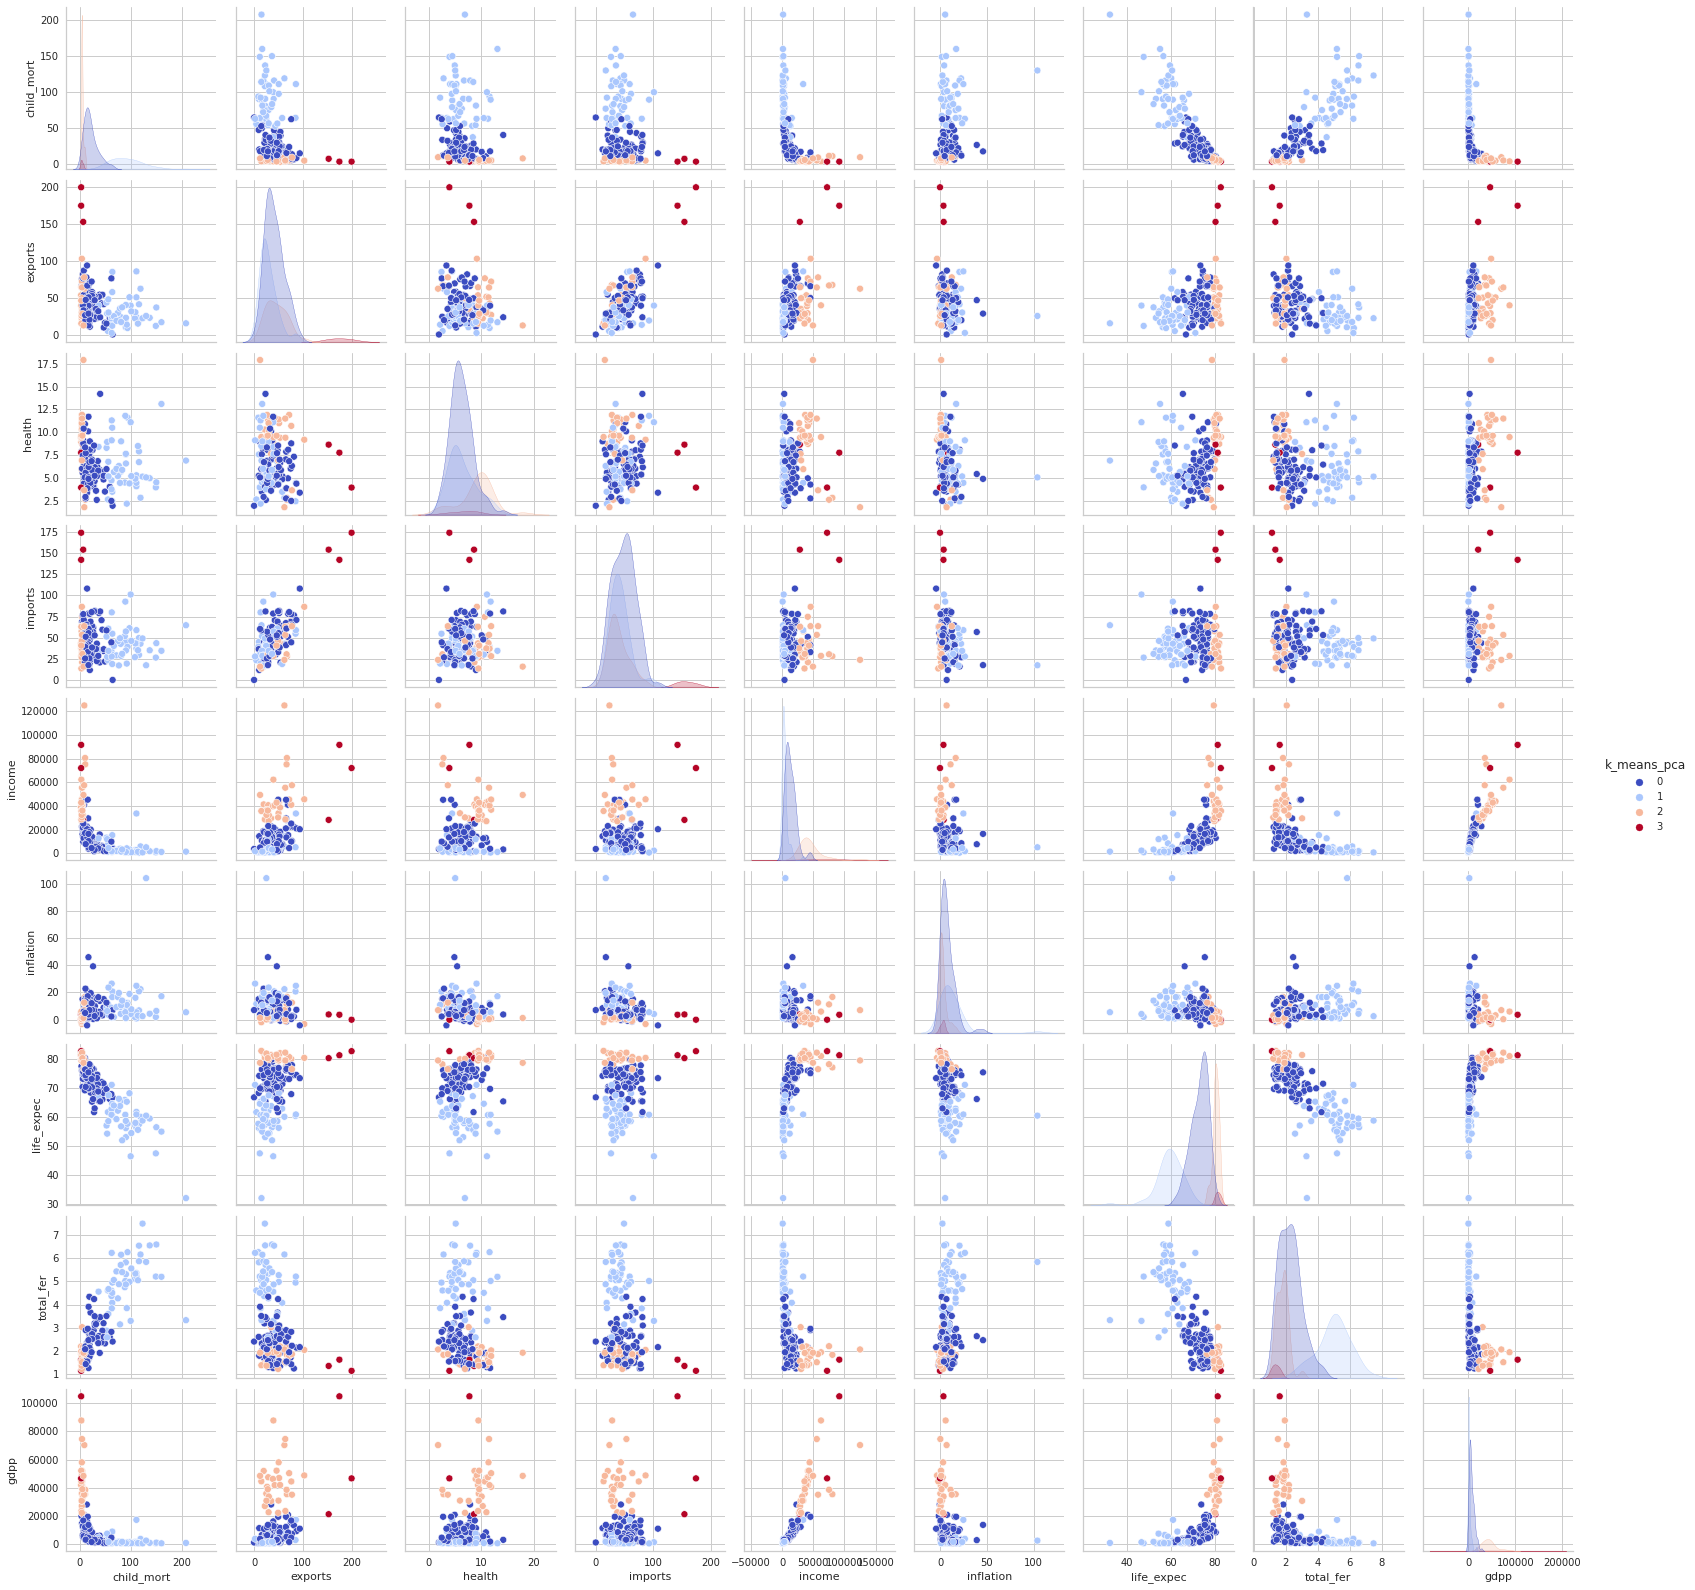

In [280]:
sns.pairplot(data=df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca',]], hue='k_means_pca', palette='coolwarm')

In [281]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,hc_tsne,dbscan_pca,dbscan
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1,0,0,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0,0,0,0,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0,0,0,0,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1,0,0,0,-1,-1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0,0,0,0,1,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0,0,0,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0,0,0,1,1,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,1,0,0,0,0,0


<AxesSubplot: xlabel='child_mort', ylabel='gdpp'>

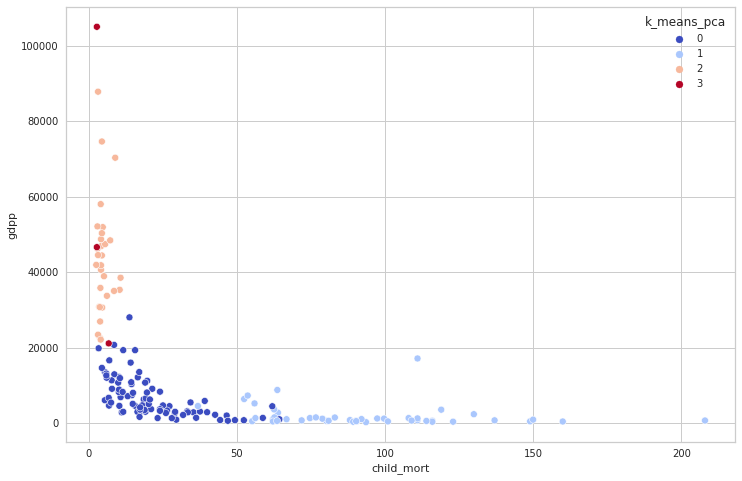

In [282]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_country, x='child_mort', y='gdpp', hue='k_means_pca', palette='coolwarm')  

In [283]:
df_country[df_country['k_means_pca']==0].sort_values(by=['child_mort','gdpp'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,hc_tsne,dbscan_pca,dbscan
43,Czech Republic,3.4,66.000,7.88,62.9000,28300,-1.430,77.5,1.51,19800,0,0,0,0,1,1,1
51,Estonia,4.5,75.100,6.03,68.7000,22700,1.740,76.0,1.72,14600,0,0,0,0,1,1,1
14,Belarus,5.5,51.400,5.61,64.5000,16200,15.100,70.4,1.49,6030,0,0,0,0,1,1,1
41,Croatia,5.5,37.600,7.76,38.1000,20100,0.821,76.3,1.55,13500,0,0,0,0,1,1,1
121,Poland,6.0,40.100,7.46,42.1000,21800,1.660,76.3,1.41,12600,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.140,70.4,2.33,758,0,0,0,0,0,1,1
146,Tajikistan,52.4,14.900,5.98,58.6000,2110,12.500,69.6,3.51,738,0,0,0,0,0,1,1
69,India,58.8,22.600,4.05,27.1000,4410,8.980,66.2,2.60,1350,0,0,0,0,0,1,1
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.310,67.9,2.83,4440,0,0,0,0,0,-1,-1


In [284]:
df_country[df_country['k_means_pca']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,hc_tsne,dbscan_pca,dbscan
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2,2,1,1,1,1,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2,2,1,1,1,1,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2,2,1,1,1,-1,-1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2,2,1,1,1,-1,-1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2,2,1,1,1,1,1
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2,2,0,0,1,1,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2,2,1,1,1,1,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,2,2,1,1,1,1,1
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,2,2,1,1,1,1,1
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,2,2,1,1,1,1,1


In [285]:
df_country[df_country['k_means_pca']==1]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,hc_tsne,dbscan_pca,dbscan
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,1,0,0,0,0,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,1,0,0,0,-1,-1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1,1,0,0,0,0,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1,1,0,0,0,-1,-1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1,1,0,0,0,0,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1,1,0,0,0,0,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1,1,0,0,0,0,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1,1,0,0,0,-1,-1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1,1,0,0,0,0,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1,1,0,0,0,0,0


In [286]:
df_country[df_country['k_means_pca']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,hc_tsne,dbscan_pca,dbscan
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3,3,1,1,1,-1,-1
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3,3,1,1,1,-1,-1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3,3,1,1,1,-1,-1


In [287]:
!pip install pycountry

In [288]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [289]:
import pycountry
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


def get_alpha_3(location):
    try:
        return pycountry.countries.get(name=location).alpha_3
    except:
        return None



df_map = df_country.copy()
df_map['iso_alpha'] = df_country['country'].apply(lambda x: get_alpha_3(x))

iso3_to_iso2 = {c.alpha_3: c.alpha_2 for c in pycountry.countries}
df_map["iso_alpha2"] = df_map["iso_alpha"].map(iso3_to_iso2)



# for bar inflation u other
df_bar = df_map[['inflation', 'country', 'k_means_pca']].sort_values(by='inflation',ascending=False).head(10)


# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.5, 0.5],
    row_heights=[0.6, 0.4],
    subplot_titles=('life expectancy vs inflation with size by gdpp',
                    '10 countries with higher inflation',
                    'Countries of the world by k means pca cluster'),
    specs=[[{"type": "scatter", "colspan": 2}, None],
           [{"type": "bar"}, {"type": "choropleth"}]])


# Add scattergeo globe map of volcano locations
# fig.add_trace(
#     px.choropleth(df_map, locations='Code',
#                   color='k_means_pca',
#                   hover_name='country',
#                   color_continuous_scale=px.colors.sequential.Plasma).data,
#     row=1, col=1
# )


#######################

fig1 = px.scatter(
    df_map,
    x="life_expec",
    y="inflation",
    hover_name="country",
    hover_data=["life_expec", 'inflation', "gdpp"]
)

fig1.update_traces(marker_color="rgba(0,0,0,0)")

minDim = df_map[["life_expec", "inflation"]].max().idxmax()
maxi = df_map[minDim].max()


# fig1.update_layout(height=600, width=1000, plot_bgcolor="#dfdfdf", yaxis_range=[-5e3, 55e3])


trace1 = fig1.data[0]

fig.add_trace(trace1, row=1, col=1)

for i, row in df_map.iterrows():
    country_iso = row["iso_alpha2"]
    fig.add_layout_image(
        dict(
            source=f"https://raw.githubusercontent.com/matahombres/CSS-Country-Flags-Rounded/master/flags/{country_iso}.png",
            xref="x",
            yref="y",
            xanchor="center",
            yanchor="middle",
            x=row["life_expec"],
            y=row["inflation"],
            sizex=np.sqrt(row["gdpp"] / df_map["gdpp"].max()) * maxi * 0.15 + maxi * 0.03,
            sizey=np.sqrt(row["gdpp"] / df_map["gdpp"].max()) * maxi * 0.15+ maxi * 0.03,
            sizing="contain",
            opacity=0.8,
            layer="above"
        )
    )


##########################


# Add locations bar chart
fig.add_trace(
    go.Bar(x=df_bar.country, 
           y=df_bar.inflation,
           marker=dict(color=df_bar.inflation, 
                      showscale=True, 
                      colorscale=px.colors.diverging.RdBu[::-1], 
                      cmax=df_map.inflation.max(), cmin=df_map.inflation.min(),
                      colorbar=dict(len=0.45, x=0.47, y=0.2),
                      colorbar_title = "Inflation",),
           showlegend=False,
          ),
    row=2, col=1
)



fig.add_trace(
    go.Choropleth(
        locations=df_map.iso_alpha,
        z=df_map.k_means_pca,
        marker_line_color='red',
        colorbar_title = "Cluster",
        colorscale=[[0, 'rgb(175, 100, 88)'], [0.25, 'rgb(175, 100, 88)'],
                   [0.25, '#479B55'], [0.5, '#479B55'],
                   [0.5, '#FA0087'], [0.75, '#FA0087'],
                   [0.75, 'rgb(117, 112, 179)'], [1, 'rgb(117, 112, 179)']],
        marker_opacity=0.5, 
        marker_line_width=0,
        hoverinfo='location+z', 
        zmin=df_map.k_means_pca.min(),
        zmax=df_map.k_means_pca.max(),
        colorbar=dict(len=0.45, y=0.2),
    ),
    row=2, col=2
)



#############################################



##################################

# # Add 3d surface of volcano
# fig.add_trace(
#     go.Surface(z=df_v.values.tolist(), showscale=False),
#     row=2, col=2
# )



# Update geo subplot properties
fig.update_geos(
    countrycolor="red",
    fitbounds="locations",
    visible=False,
    projection_type="natural earth",
    landcolor="white",
#     oceancolor="MidnightBlue",
    showocean=True,
#     lakecolor="LightBlue",
    lataxis_showgrid=True, lonaxis_showgrid=True
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=30, automargin='height')

# Set theme, margin, and annotation in layout
fig.update_layout(
    width=1400, height=800,
    margin=dict(r=5, t=25, b=20, l=60),
#     annotations=[
#         dict(
#             text="Source: AAZG",
#             showarrow=False,
#             xref="paper",
#             yref="paper",
#             x=0,
#             y=-0.1)
#     ]
)

# Update xaxis properties
fig.update_xaxes(title_text="Life expectative", row=1, col=1)
fig.update_xaxes(title_text="Paises", row=2, col=1)
# fig.update_xaxes(title_text="xaxis 4 title", type="log", row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Inflation", row=1, col=1)
fig.update_yaxes(title_text="Inflation", row=2, col=1)
# fig.update_yaxes(title_text="yaxis 4 title", row=2, col=2)

fig.show()